# Evaluation
In this final notebook we will evaluate the models' classifications by visualizing the calculated confusion matrices and scores

## Preparation
### Imports

In [1]:
# metrics and visualization
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, fbeta_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.metrics import specificity_score

import pickle # to load the pickled results dictionary
import pandas as pd, polars as pl # dataframes
import matplotlib.pyplot as plt # plotting

### Warnings

In [2]:
import warnings
# possibly given if bootstrap scores are zero
warnings.filterwarnings("ignore", category=UserWarning)

### Loading the Data

In [6]:
with open('./results_test.pkl', 'rb') as f:
    results = pickle.load(f)

In [5]:
with open('./results_llama.pkl', 'rb') as file:
    results = pickle.load(file)

TypeError: a bytes-like object is required, not 'list'

In [7]:
with open('./results_testset.pkl', 'rb') as file:
    results = pickle.load(file)

TypeError: a bytes-like object is required, not 'list'

# Inspection

In [ ]:
scores = results['scores']
scores.filter(
    pl.col('dataset') == 'adhd'
).select(['dataset', 'estimator', 'recall', 'specificity', 'precision', 'f1', 'f2', 'accuracy'])

shape: (5, 8)
┌─────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┐
│ dataset ┆ estimator  ┆ recall     ┆ specificit ┆ precision  ┆ f1         ┆ f2        ┆ accuracy  │
│ ---     ┆ ---        ┆ ---        ┆ y          ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ str     ┆ str        ┆ struct[3]  ┆ ---        ┆ struct[3]  ┆ struct[3]  ┆ struct[3] ┆ struct[3] │
│         ┆            ┆            ┆ struct[3]  ┆            ┆            ┆           ┆           │
╞═════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╡
│ adhd    ┆ logistic_r ┆ {0.83,0.4, ┆ {0.88,0.83 ┆ {0.15,0.04 ┆ {0.24,0.07 ┆ {0.41,0.1 ┆ {0.88,0.8 │
│         ┆ egression  ┆ 1.0}       ┆ ,0.92}     ┆ ,0.27}     ┆ ,0.41}     ┆ 4,0.62}   ┆ 3,0.92}   │
│ adhd    ┆ random_for ┆ {0.83,0.4, ┆ {0.8,0.75, ┆ {0.1,0.02, ┆ {0.17,0.04 ┆ {0.31,0.0 ┆ {0.8,0.75 │
│         ┆ est        ┆ 1.0}       ┆ 0.86}      ┆ 0.19}      ┆ ,0.31}     ┆ 9,0.51}   ┆ ,0.85}    │
│ adhd    ┆ support_ve ┆ {0.83,0.4, ┆ {0.9,0.86, ┆ {0.18,0.04 ┆ {0.29,0.07 ┆ {0.46,0.1 ┆ {0.9,0.86 │
│         ┆ ctor_machi ┆ 1.0}       ┆ 0.94}      ┆ ,0.34}     ┆ ,0.5}      ┆ 5,0.69}   ┆ ,0.94}    │
│         ┆ ne         ┆            ┆            ┆            ┆            ┆           ┆           │
│ adhd    ┆ naive_baye ┆ {1.0,1.0,1 ┆ {0.61,0.55 ┆ {0.06,0.02 ┆ {0.12,0.04 ┆ {0.25,0.0 ┆ {0.62,0.5 │
│         ┆ s          ┆ .0}        ┆ ,0.67}     ┆ ,0.11}     ┆ ,0.21}     ┆ 9,0.39}   ┆ 6,0.68}   │
│ adhd    ┆ llama      ┆ {1.0,1.0,1 ┆ {0.81,0.76 ┆ {0.12,0.04 ┆ {0.21,0.07 ┆ {0.39,0.1 ┆ {0.81,0.7 │
│         ┆            ┆ .0}        ┆ ,0.85}     ┆ ,0.22}     ┆ ,0.35}     ┆ 6,0.58}   ┆ 7,0.86}   │
└─────────┴────────────┴────────────┴────────────┴────────────┴────────────┴───────────┴───────────┘

In [ ]:
scores_llama = scores.filter(pl.col('estimator') == 'logistic_regression')
scores_llama.select(['dataset', 'recall', 'specificity', 'precision', 'f1', 'f2', 'accuracy'])

shape: (6, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ dataset      ┆ recall      ┆ specificity ┆ precision   ┆ f1          ┆ f2          ┆ accuracy    │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         │
│ str          ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ adhd         ┆ {0.83,0.4,1 ┆ {0.88,0.83, ┆ {0.15,0.04, ┆ {0.24,0.07, ┆ {0.41,0.14, ┆ {0.88,0.83, │
│              ┆ .0}         ┆ 0.92}       ┆ 0.27}       ┆ 0.41}       ┆ 0.62}       ┆ 0.92}       │
│ animal_depre ┆ {0.92,0.85, ┆ {0.91,0.89, ┆ {0.65,0.55, ┆ {0.76,0.68, ┆ {0.85,0.78, ┆ {0.92,0.89, │
│ ssion        ┆ 0.97}       ┆ 0.94}       ┆ 0.74}       ┆ 0.83}       ┆ 0.9}        ┆ 0.94}       │
│ atypical_ant ┆ {0.84,0.71, ┆ {0.75,0.7,0 ┆ {0.34,0.25, ┆ {0.48,0.37, ┆ {0.64,0.53, ┆ {0.76,0.71, │
│ ipsychotics  ┆ 0.94}       ┆ .8}         ┆ 0.43}       ┆ 0.57}       ┆ 0.73}       ┆ 0.81}       │
│ calcium_chan ┆ {0.68,0.48, ┆ {0.77,0.73, ┆ {0.21,0.13, ┆ {0.32,0.21, ┆ {0.47,0.33, ┆ {0.77,0.72, │
│ nel_blockers ┆ 0.86}       ┆ 0.82}       ┆ 0.3}        ┆ 0.44}       ┆ 0.6}        ┆ 0.81}       │
│ oral_hypogly ┆ {0.59,0.42, ┆ {0.73,0.63, ┆ {0.43,0.29, ┆ {0.49,0.36, ┆ {0.54,0.4,0 ┆ {0.69,0.61, │
│ cemics       ┆ 0.76}       ┆ 0.81}       ┆ 0.57}       ┆ 0.62}       ┆ .68}        ┆ 0.77}       │
│ pancreatic_s ┆ {0.85,0.82, ┆ {0.87,0.87, ┆ {0.28,0.26, ┆ {0.43,0.4,0 ┆ {0.61,0.58, ┆ {0.87,0.86, │
│ urgery       ┆ 0.88}       ┆ 0.88}       ┆ 0.3}        ┆ .45}        ┆ 0.64}       ┆ 0.88}       │
└──────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┘

In [ ]:
report = results_llama['adhd']['classification_report']
print(report)

              precision    recall  f1-score   support

       False       1.00      0.82      0.90       779
        True       0.12      1.00      0.21        19

    accuracy                           0.82       798
   macro avg       0.56      0.91      0.56       798
weighted avg       0.98      0.82      0.88       798



In [ ]:
results['datasets']['adhd']['logistic_regression']['bootstrap']['scores']['specificity']

array([0.85232068, 0.90295359, 0.88135593, 0.82905983, 0.88888889,
       0.87179487, 0.88510638, 0.87179487, 0.86440678, 0.90212766,
       0.88888889, 0.87815126, 0.88607595, 0.86864407, 0.85957447,
       0.89270386, 0.85106383, 0.88311688, 0.87124464, 0.90598291,
       0.86919831, 0.88793103, 0.88034188, 0.87179487, 0.9055794 ,
       0.86695279, 0.88607595, 0.8649789 , 0.85470085, 0.87234043,
       0.88702929, 0.88793103, 0.87982833, 0.88841202, 0.9047619 ,
       0.8893617 , 0.90909091, 0.87982833, 0.89029536, 0.83404255,
       0.90254237, 0.89956332, 0.88412017, 0.90295359, 0.88888889,
       0.90638298, 0.85470085, 0.875     , 0.87179487, 0.86808511,
       0.89873418, 0.86324786, 0.86864407, 0.9017094 , 0.88412017,
       0.84978541, 0.90638298, 0.88510638, 0.86134454, 0.85775862,
       0.83478261, 0.89029536, 0.86266094, 0.84549356, 0.90517241,
       0.86324786, 0.90598291, 0.88362069, 0.84518828, 0.89177489,
       0.88983051, 0.92372881, 0.88646288, 0.84680851, 0.88646

In [5]:
report = results['datasets']['pancreatic_surgery']['support_vector_machine']['classification_report']

print(report)

NameError: name 'results' is not defined

In [8]:
scores = results['scores']

scores.filter(
    pl.col('estimator').eq('llama'),
    pl.col('recall').struct.field('recall_mean').gt(0.85),
    #pl.col('specificity').struct.field('specificity_mean').gt(0.791),
).select(['dataset', 'recall', 'specificity', 'precision', 'f1', 'f2', 'accuracy'])

shape: (3, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ dataset      ┆ recall      ┆ specificity ┆ precision   ┆ f1          ┆ f2          ┆ accuracy    │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         │
│ str          ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   ┆ struct[3]   │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ adhd         ┆ {1.0,1.0,1. ┆ {0.81,0.75, ┆ {0.12,0.04, ┆ {0.2,0.07,0 ┆ {0.38,0.17, ┆ {0.81,0.76, │
│              ┆ 0}          ┆ 0.86}       ┆ 0.21}       ┆ .35}        ┆ 0.57}       ┆ 0.86}       │
│ animal_depre ┆ {0.96,0.91, ┆ {0.83,0.79, ┆ {0.49,0.4,0 ┆ {0.65,0.57, ┆ {0.8,0.74,0 ┆ {0.85,0.81, │
│ ssion        ┆ 1.0}        ┆ 0.86}       ┆ .57}        ┆ 0.72}       ┆ .85}        ┆ 0.88}       │
│ oral_hypogly ┆ {0.89,0.78, ┆ {0.29,0.2,0 ┆ {0.31,0.22, ┆ {0.45,0.35, ┆ {0.64,0.54, ┆ {0.44,0.37, │
│ cemics       ┆ 0.98}       ┆ .38}        ┆ 0.4}        ┆ 0.55}       ┆ 0.74}       ┆ 0.53}       │
└──────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┘

In [9]:
frame = results['scores']
frame



shape: (30, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ dataset    ┆ estimator  ┆ accuracy   ┆ precision ┆ recall    ┆ f1        ┆ f2        ┆ specifici │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ty        │
│ str        ┆ str        ┆ struct[3]  ┆ struct[3] ┆ struct[3] ┆ struct[3] ┆ struct[3] ┆ ---       │
│            ┆            ┆            ┆           ┆           ┆           ┆           ┆ struct[3] │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ adhd       ┆ logistic_r ┆ {0.87,0.83 ┆ {0.14,0.0 ┆ {0.83,0.4 ┆ {0.24,0.0 ┆ {0.41,0.1 ┆ {0.88,0.8 │
│            ┆ egression  ┆ ,0.92}     ┆ 3,0.27}   ┆ 3,1.0}    ┆ 6,0.42}   ┆ 3,0.62}   ┆ 3,0.92}   │
│ adhd       ┆ random_for ┆ {0.8,0.75, ┆ {0.1,0.02 ┆ {0.84,0.4 ┆ {0.17,0.0 ┆ {0.32,0.0 ┆ {0.8,0.75 │
│            ┆ est        ┆ 0.85}      ┆ ,0.18}    ┆ 4,1.0}    ┆ 4,0.31}   ┆ 9,0.51}   ┆ ,0.85}    │
│ adhd       ┆ support_ve ┆ {0.9,0.86, ┆ {0.18,0.0 ┆ {0.83,0.4 ┆ {0.29,0.0 ┆ {0.46,0.1 ┆ {0.9,0.86 │
│            ┆ ctor_machi ┆ 0.94}      ┆ 4,0.32}   ┆ 3,1.0}    ┆ 8,0.48}   ┆ 6,0.68}   ┆ ,0.94}    │
│            ┆ ne         ┆            ┆           ┆           ┆           ┆           ┆           │
│ adhd       ┆ naive_baye ┆ {0.62,0.56 ┆ {0.06,0.0 ┆ {1.0,1.0, ┆ {0.11,0.0 ┆ {0.24,0.0 ┆ {0.61,0.5 │
│            ┆ s          ┆ ,0.68}     ┆ 2,0.11}   ┆ 1.0}      ┆ 4,0.2}    ┆ 9,0.38}   ┆ 5,0.67}   │
│ adhd       ┆ llama      ┆ {0.81,0.76 ┆ {0.12,0.0 ┆ {1.0,1.0, ┆ {0.2,0.07 ┆ {0.38,0.1 ┆ {0.81,0.7 │
│            ┆            ┆ ,0.86}     ┆ 4,0.21}   ┆ 1.0}      ┆ ,0.35}    ┆ 7,0.57}   ┆ 5,0.86}   │
│ …          ┆ …          ┆ …          ┆ …         ┆ …         ┆ …         ┆ …         ┆ …         │
│ pancreatic ┆ logistic_r ┆ {0.87,0.86 ┆ {0.28,0.2 ┆ {0.85,0.8 ┆ {0.43,0.4 ┆ {0.61,0.5 ┆ {0.87,0.8 │
│ _surgery   ┆ egression  ┆ ,0.88}     ┆ 6,0.31}   ┆ 2,0.88}   ┆ ,0.45}    ┆ 8,0.64}   ┆ 6,0.88}   │
│ pancreatic ┆ random_for ┆ {0.84,0.83 ┆ {0.24,0.2 ┆ {0.88,0.8 ┆ {0.38,0.3 ┆ {0.58,0.5 ┆ {0.84,0.8 │
│ _surgery   ┆ est        ┆ ,0.85}     ┆ 2,0.26}   ┆ 5,0.91}   ┆ 5,0.41}   ┆ 5,0.6}    ┆ 3,0.84}   │
│ pancreatic ┆ support_ve ┆ {0.88,0.87 ┆ {0.29,0.2 ┆ {0.85,0.8 ┆ {0.44,0.4 ┆ {0.62,0.5 ┆ {0.88,0.8 │
│ _surgery   ┆ ctor_machi ┆ ,0.88}     ┆ 7,0.32}   ┆ 2,0.88}   ┆ 1,0.46}   ┆ 9,0.64}   ┆ 7,0.89}   │
│            ┆ ne         ┆            ┆           ┆           ┆           ┆           ┆           │
│ pancreatic ┆ naive_baye ┆ {0.76,0.75 ┆ {0.17,0.1 ┆ {0.89,0.8 ┆ {0.29,0.2 ┆ {0.49,0.4 ┆ {0.75,0.7 │
│ _surgery   ┆ s          ┆ ,0.77}     ┆ 6,0.19}   ┆ 6,0.91}   ┆ 7,0.31}   ┆ 6,0.51}   ┆ 4,0.76}   │
│ pancreatic ┆ llama      ┆ {0.62,0.61 ┆ {0.11,0.1 ┆ {0.79,0.7 ┆ {0.19,0.1 ┆ {0.35,0.3 ┆ {0.61,0.6 │
│ _surgery   ┆            ┆ ,0.63}     ┆ ,0.12}    ┆ 6,0.83}   ┆ 7,0.2}    ┆ 2,0.37}   ┆ ,0.62}    │
└────────────┴────────────┴────────────┴───────────┴───────────┴───────────┴───────────┴───────────┘

In [10]:
frame.filter(
    (pl.col('dataset') == 'atypical_antipsychotics') #& (pl.col('estimator') == 'naive_bayes')
).select([
    'dataset',
    'estimator',
    'recall',
    'specificity',
    'precision',
    'f1',
    'f2',
    'accuracy'
])

shape: (5, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ dataset    ┆ estimator  ┆ recall     ┆ specifici ┆ precision ┆ f1        ┆ f2        ┆ accuracy  │
│ ---        ┆ ---        ┆ ---        ┆ ty        ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ str        ┆ struct[3]  ┆ ---       ┆ struct[3] ┆ struct[3] ┆ struct[3] ┆ struct[3] │
│            ┆            ┆            ┆ struct[3] ┆           ┆           ┆           ┆           │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ atypical_a ┆ logistic_r ┆ {0.83,0.71 ┆ {0.75,0.7 ┆ {0.34,0.2 ┆ {0.48,0.3 ┆ {0.64,0.5 ┆ {0.76,0.7 │
│ ntipsychot ┆ egression  ┆ ,0.93}     ┆ ,0.8}     ┆ 5,0.43}   ┆ 7,0.57}   ┆ 3,0.72}   ┆ 1,0.81}   │
│ ics        ┆            ┆            ┆           ┆           ┆           ┆           ┆           │
│ atypical_a ┆ random_for ┆ {0.81,0.69 ┆ {0.73,0.6 ┆ {0.32,0.2 ┆ {0.46,0.3 ┆ {0.62,0.5 ┆ {0.74,0.6 │
│ ntipsychot ┆ est        ┆ ,0.93}     ┆ 8,0.79}   ┆ 2,0.42}   ┆ 5,0.56}   ┆ 1,0.72}   ┆ 9,0.79}   │
│ ics        ┆            ┆            ┆           ┆           ┆           ┆           ┆           │
│ atypical_a ┆ support_ve ┆ {0.81,0.67 ┆ {0.78,0.7 ┆ {0.36,0.2 ┆ {0.49,0.3 ┆ {0.64,0.5 ┆ {0.78,0.7 │
│ ntipsychot ┆ ctor_machi ┆ ,0.92}     ┆ 3,0.82}   ┆ 6,0.45}   ┆ 9,0.59}   ┆ 3,0.74}   ┆ 3,0.82}   │
│ ics        ┆ ne         ┆            ┆           ┆           ┆           ┆           ┆           │
│ atypical_a ┆ naive_baye ┆ {0.95,0.88 ┆ {0.22,0.1 ┆ {0.16,0.1 ┆ {0.27,0.2 ┆ {0.47,0.3 ┆ {0.32,0.2 │
│ ntipsychot ┆ s          ┆ ,1.0}      ┆ 8,0.27}   ┆ 2,0.2}    ┆ 1,0.34}   ┆ 9,0.55}   ┆ 7,0.37}   │
│ ics        ┆            ┆            ┆           ┆           ┆           ┆           ┆           │
│ atypical_a ┆ llama      ┆ {0.78,0.65 ┆ {0.47,0.4 ┆ {0.18,0.1 ┆ {0.3,0.21 ┆ {0.47,0.3 ┆ {0.51,0.4 │
│ ntipsychot ┆            ┆ ,0.9}      ┆ 1,0.52}   ┆ 3,0.25}   ┆ ,0.38}    ┆ 7,0.57}   ┆ 5,0.56}   │
│ ics        ┆            ┆            ┆           ┆           ┆           ┆           ┆           │
└────────────┴────────────┴────────────┴───────────┴───────────┴───────────┴───────────┴───────────┘

### Definitions

In [11]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'f2': fbeta_score,
    'specificity': specificity_score,

}

estimators = [
    'logistic_regression',
    'random_forest',
    'support_vector_machine',
    'naive_bayes',
    'llama'
]

estimator_dict = {
    'logistic_regression': 'Logistic Regression',
    'random_forest': 'Random Forest',
    'support_vector_machine': 'Support Vector Machine',
    'naive_bayes': 'Complement Naive Bayes',
    'llama': 'Llama-3.1-8B-Instruct'
}

dataset_dict = {
    'adhd': 'ADHD',
    'animal_depression': 'Animal Depression',
    'atypical_antipsychotics': 'Atypical Antipsychotics',
    'calcium_channel_blockers': 'Calcium Channel Blockers',
    'oral_hypoglycemics': 'Oral Hypoglycemics',
    'pancreatic_surgery': 'Pancreatic Surgery'
}

### Helper Functions

In [12]:
def plot_confusion_matrix(matrix, ax, fontsize = 12):
    disp = ConfusionMatrixDisplay(matrix, display_labels=['Exclude', 'Include'])
    disp.plot(ax=ax, colorbar=False, cmap='Blues', text_kw={'fontsize': fontsize})  # Adjust fontsize for numbers
    ax.set_xlabel('Predicted Label', fontsize=fontsize)  # Adjust fontsize for x-axis label
    ax.set_ylabel('True Label', fontsize=fontsize)       # Adjust fontsize for y-axis label
    ax.tick_params(axis='both', which='major', labelsize=fontsize)  # Adjust fontsize for tick labels

In [13]:
def plot_confusion_matrices(dataset):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Decrease figure size
    axes = axes.flatten()

    for i, estimator in enumerate(estimators):
        matrix = results['datasets'][dataset][estimator]['matrix']['norm']
        plot_confusion_matrix(matrix, axes[i])

    for i in range(len(estimators), len(axes)):
        fig.delaxes(axes[i])
    
    # Ensure that at least one axis contains an image before adding a colorbar
    if any(ax.images for ax in axes):
        # Add a single colorbar for all subplots
        cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust color bar size and position
        for ax in axes:
            if ax.images:
                fig.colorbar(ax.images[0], cax=cbar_ax)
                break

    fig.suptitle(dataset, fontsize=18)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()

In [14]:
def pretty_print_dataframe(df):
    with pl.Config(tbl_cols=-1, tbl_width_chars=1000):
        print(df, end='\n\n')

In [15]:
def print_summary(dataset):
    summary = results['scores'].filter(
        pl.col('dataset') == dataset
    ).select(pl.exclude('dataset'))
    pretty_print_dataframe(summary)

## Inspection

### Confusion Matrices

In [17]:
list_datasets = [
    'pancreatic_surgery',
    'animal_depression',
    'adhd',
    'atypical_antipsychotics',
    'calcium_channel_blockers',
    'oral_hypoglycemics'
]

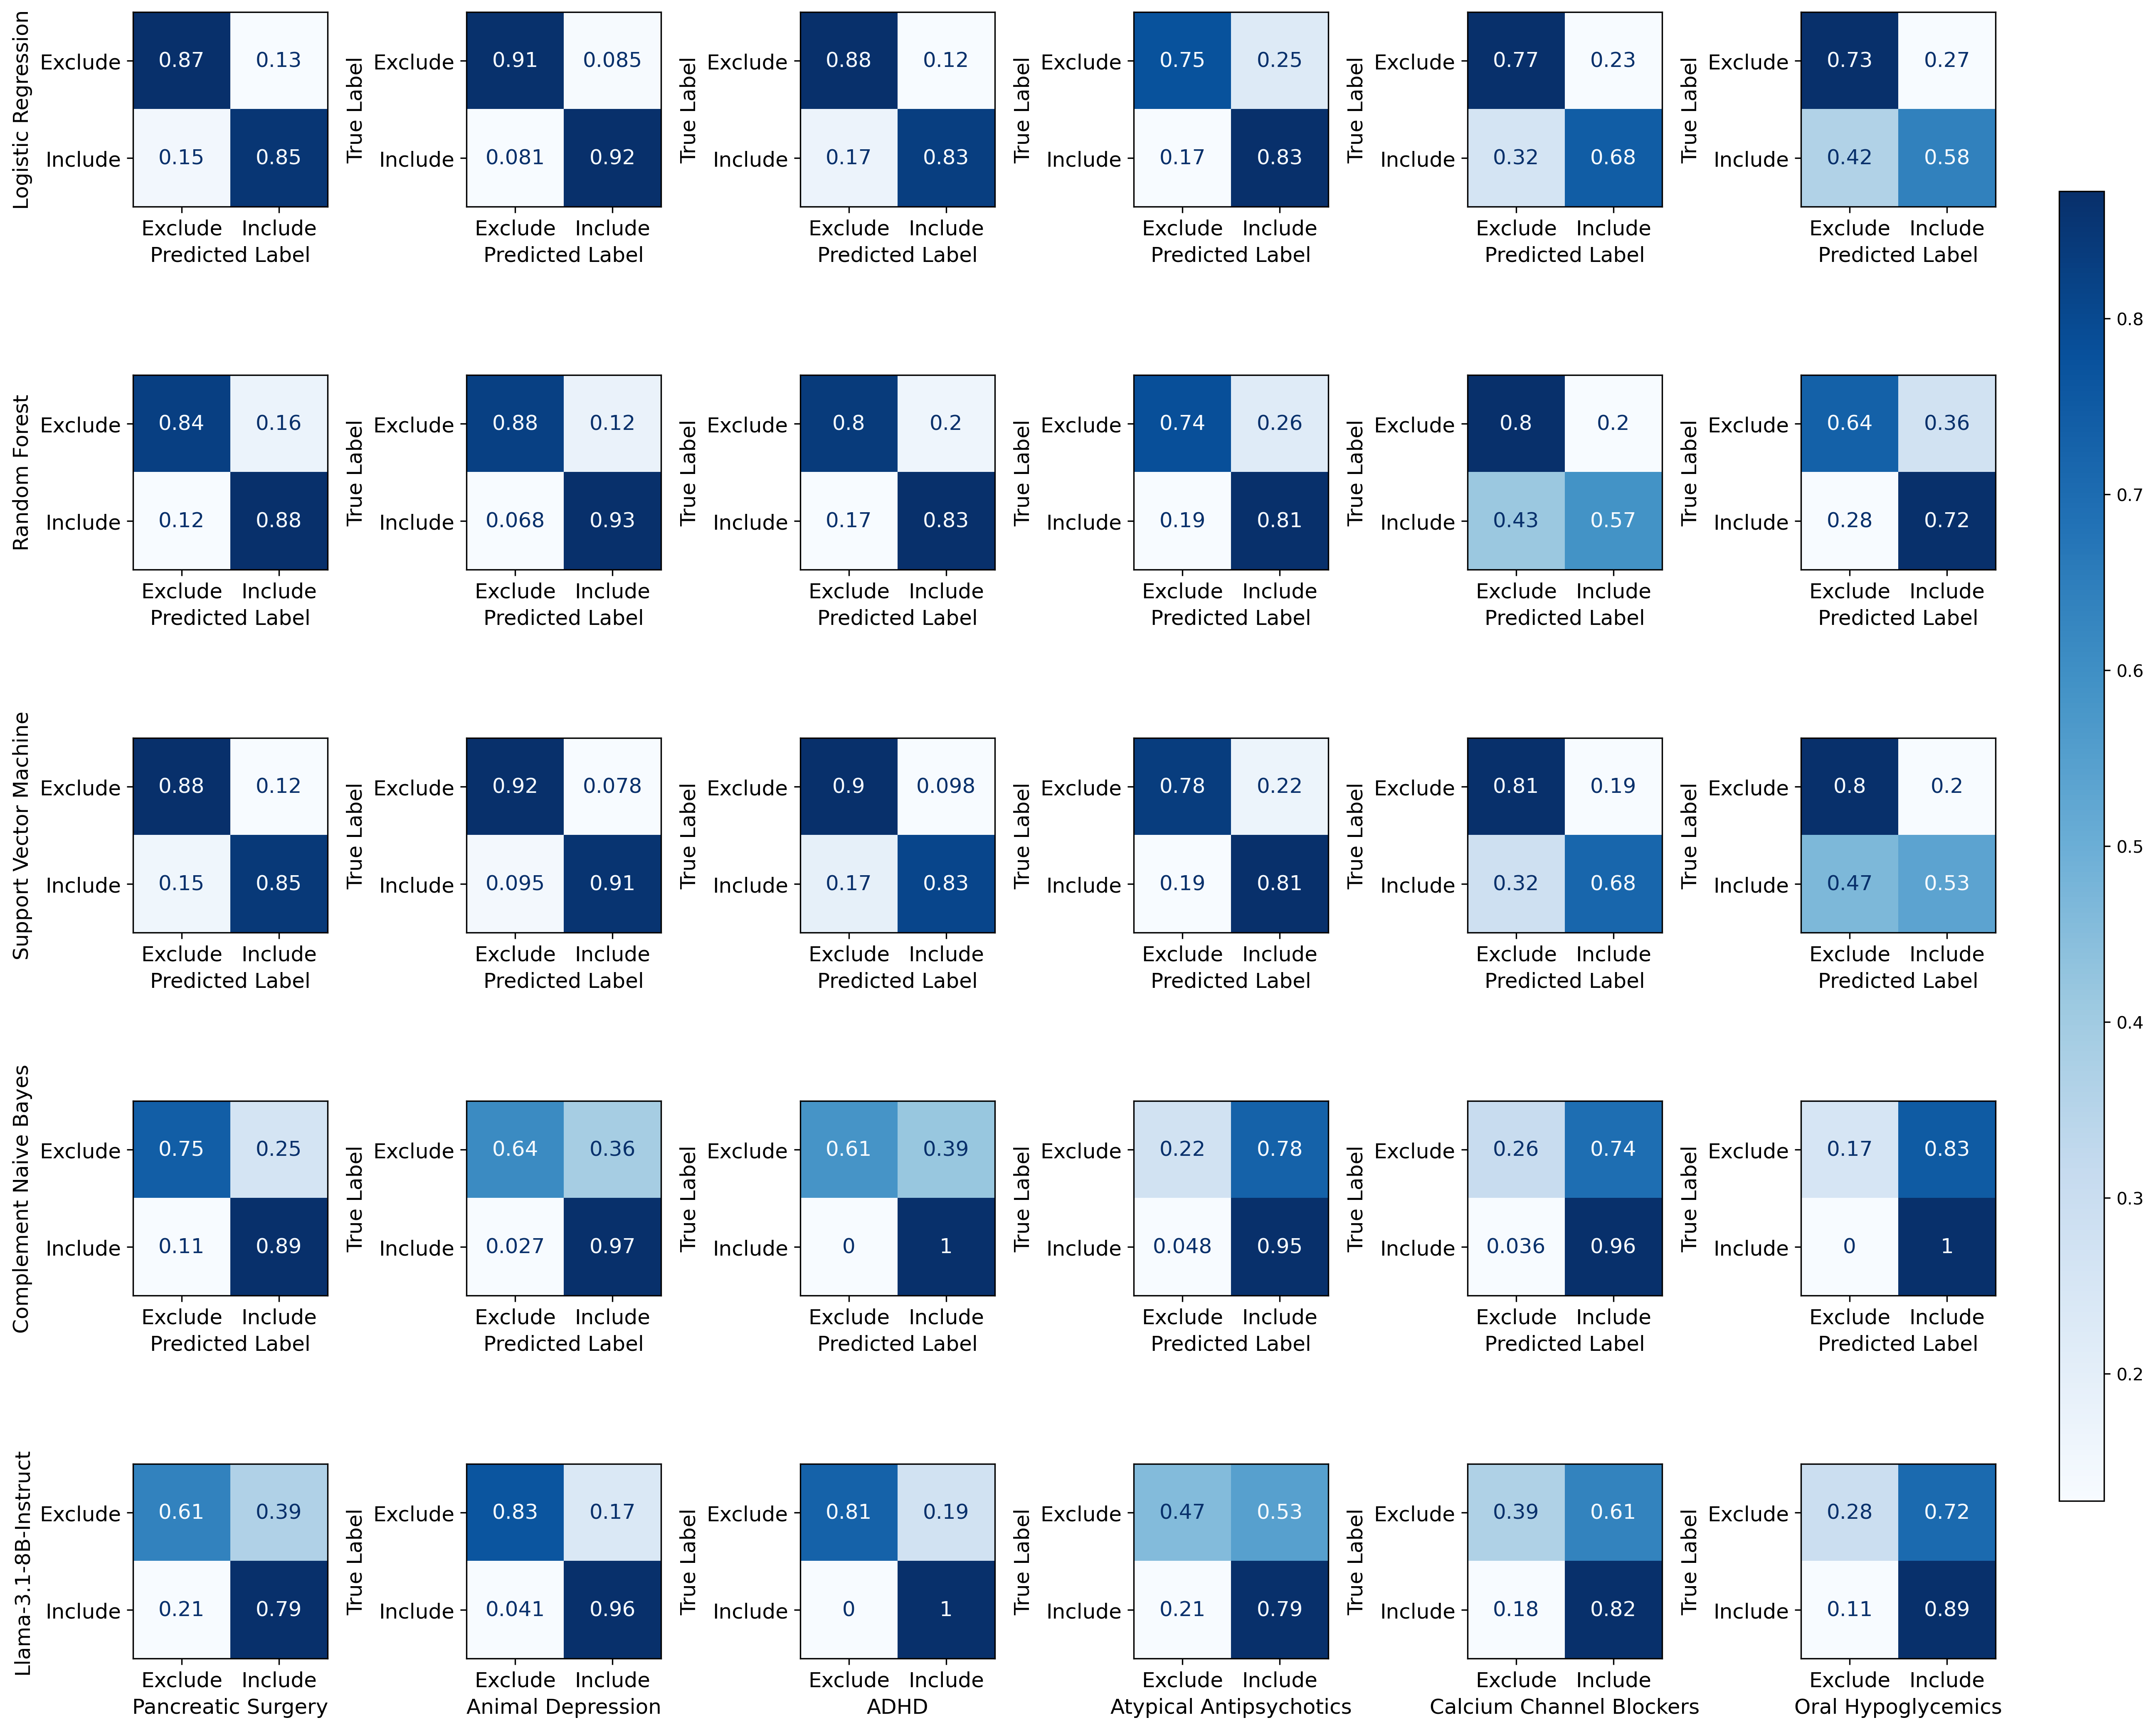

In [18]:
# Get the list of datasets and estimators
datasets = list_datasets

estimators = list(results['datasets'][datasets[0]].keys())

# Create a figure with subplots for each dataset and estimator
fig, axes = plt.subplots(len(estimators), len(datasets), figsize=(18, 15), dpi=300)  # Adjust the figure size as needed

# Iterate over each dataset and estimator to plot the confusion matrices
for i, estimator in enumerate(estimators):
    for j, dataset in enumerate(datasets):
        ax = axes[i, j]
        matrix_norm = results['datasets'][dataset][estimator]['matrix']['norm']
        plot_confusion_matrix(matrix_norm, ax, fontsize=12)

# Set the y-axis labels to the estimators
for i, estimator in enumerate(estimators):
    axes[i, 0].set_ylabel(estimator_dict[estimator], fontsize=12)

# Set the x-axis labels to the datasets below the lowest subplot in each column
for j, dataset in enumerate(datasets):
    axes[-1, j].set_xlabel(dataset_dict[dataset], fontsize=12)

# Add a single colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(axes[0, 0].images[0], cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 0.98])
#plt.suptitle('Classification Results', fontsize=20)

# Save the figure as an SVG file
plt.savefig('matrix_of_matrices.svg', format='svg')
plt.show()

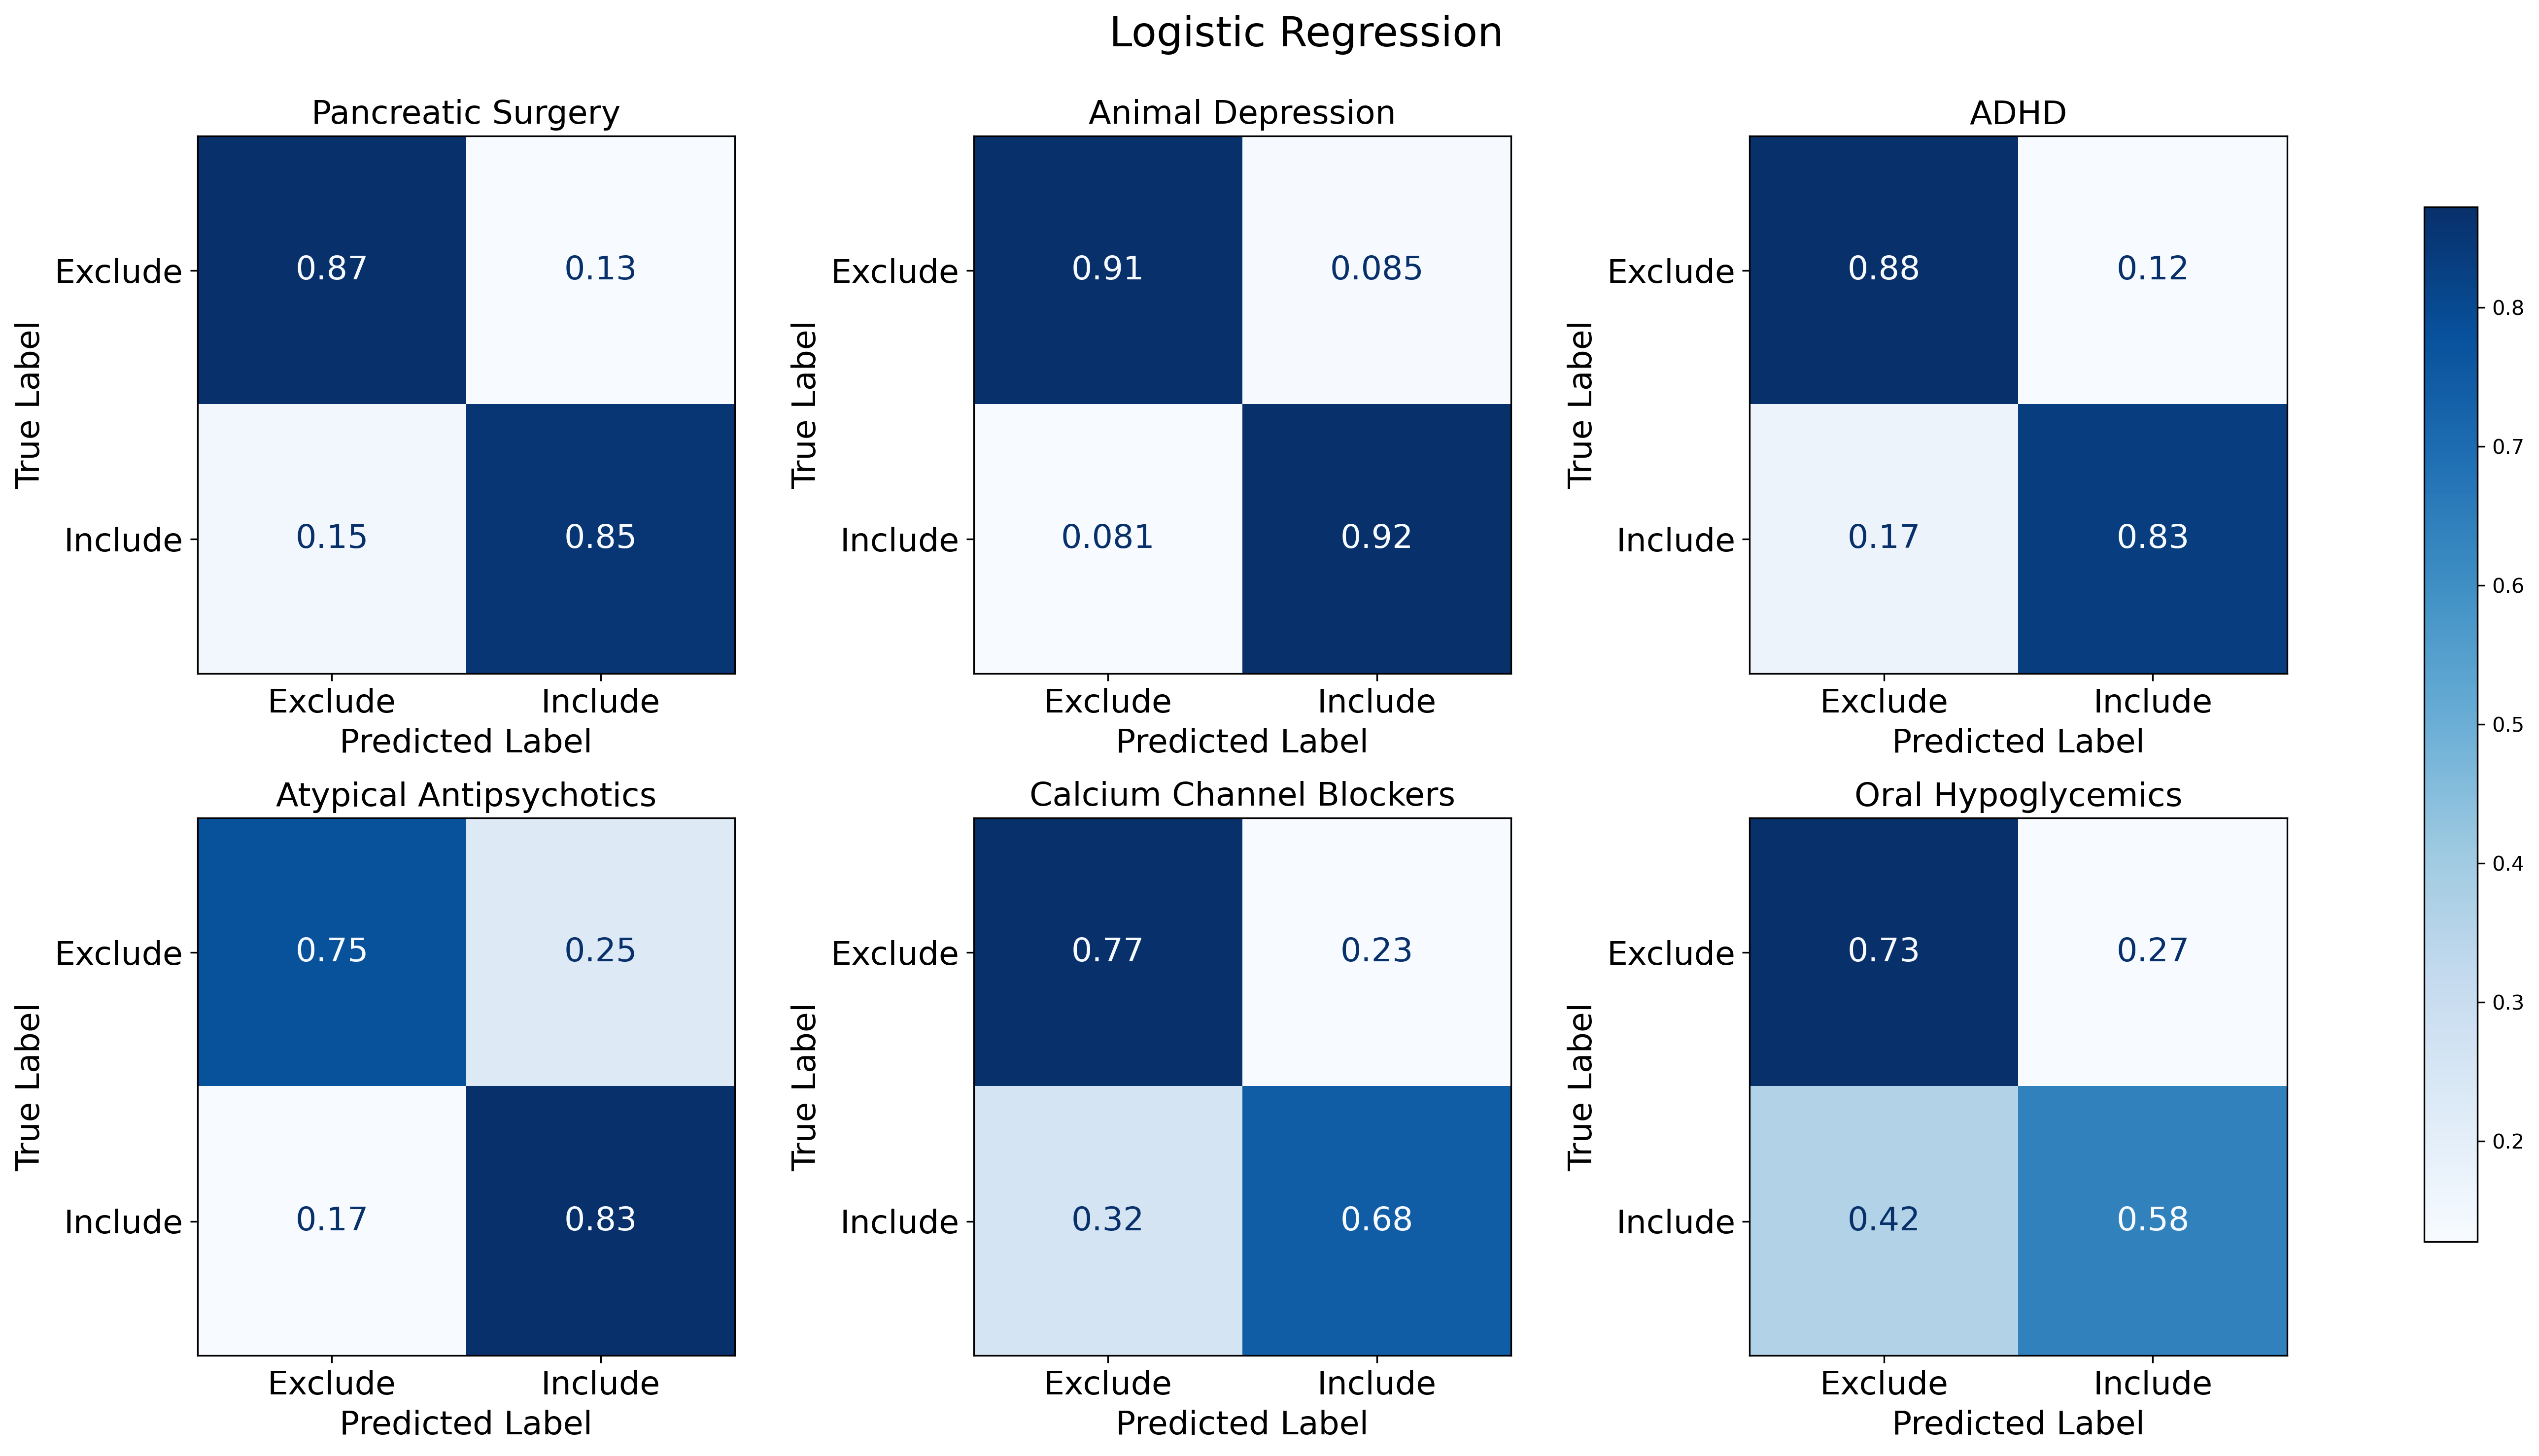

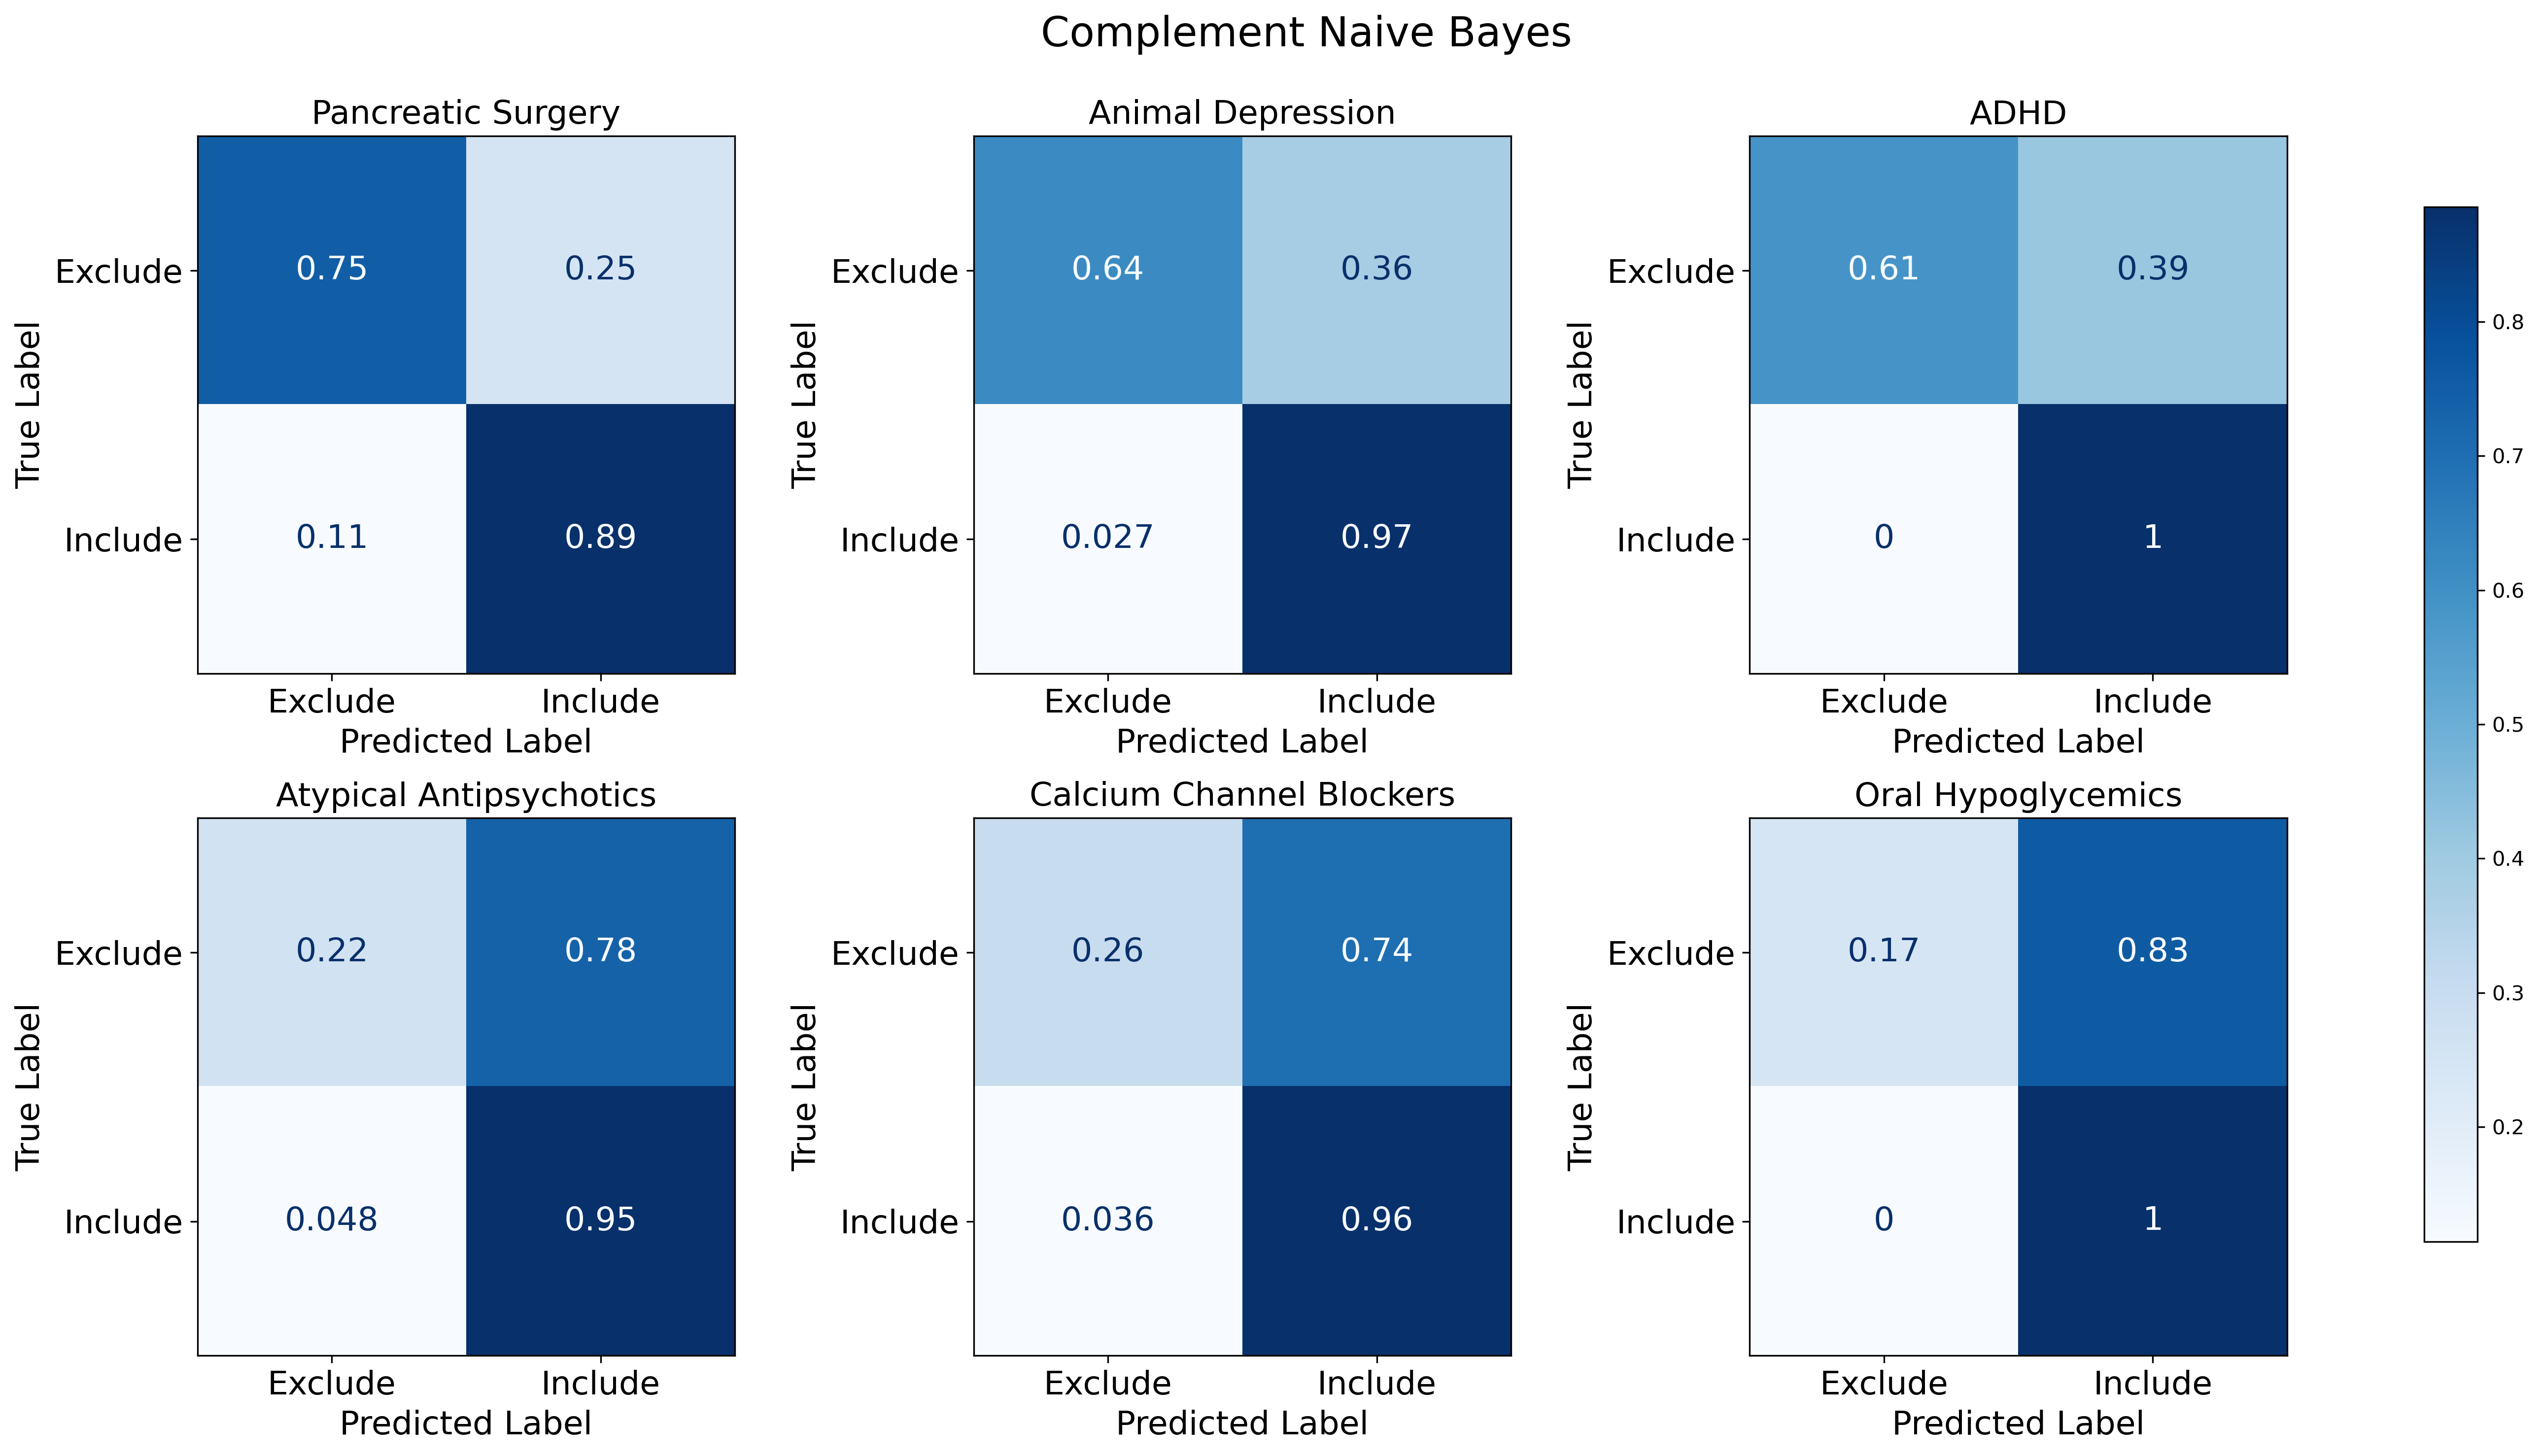

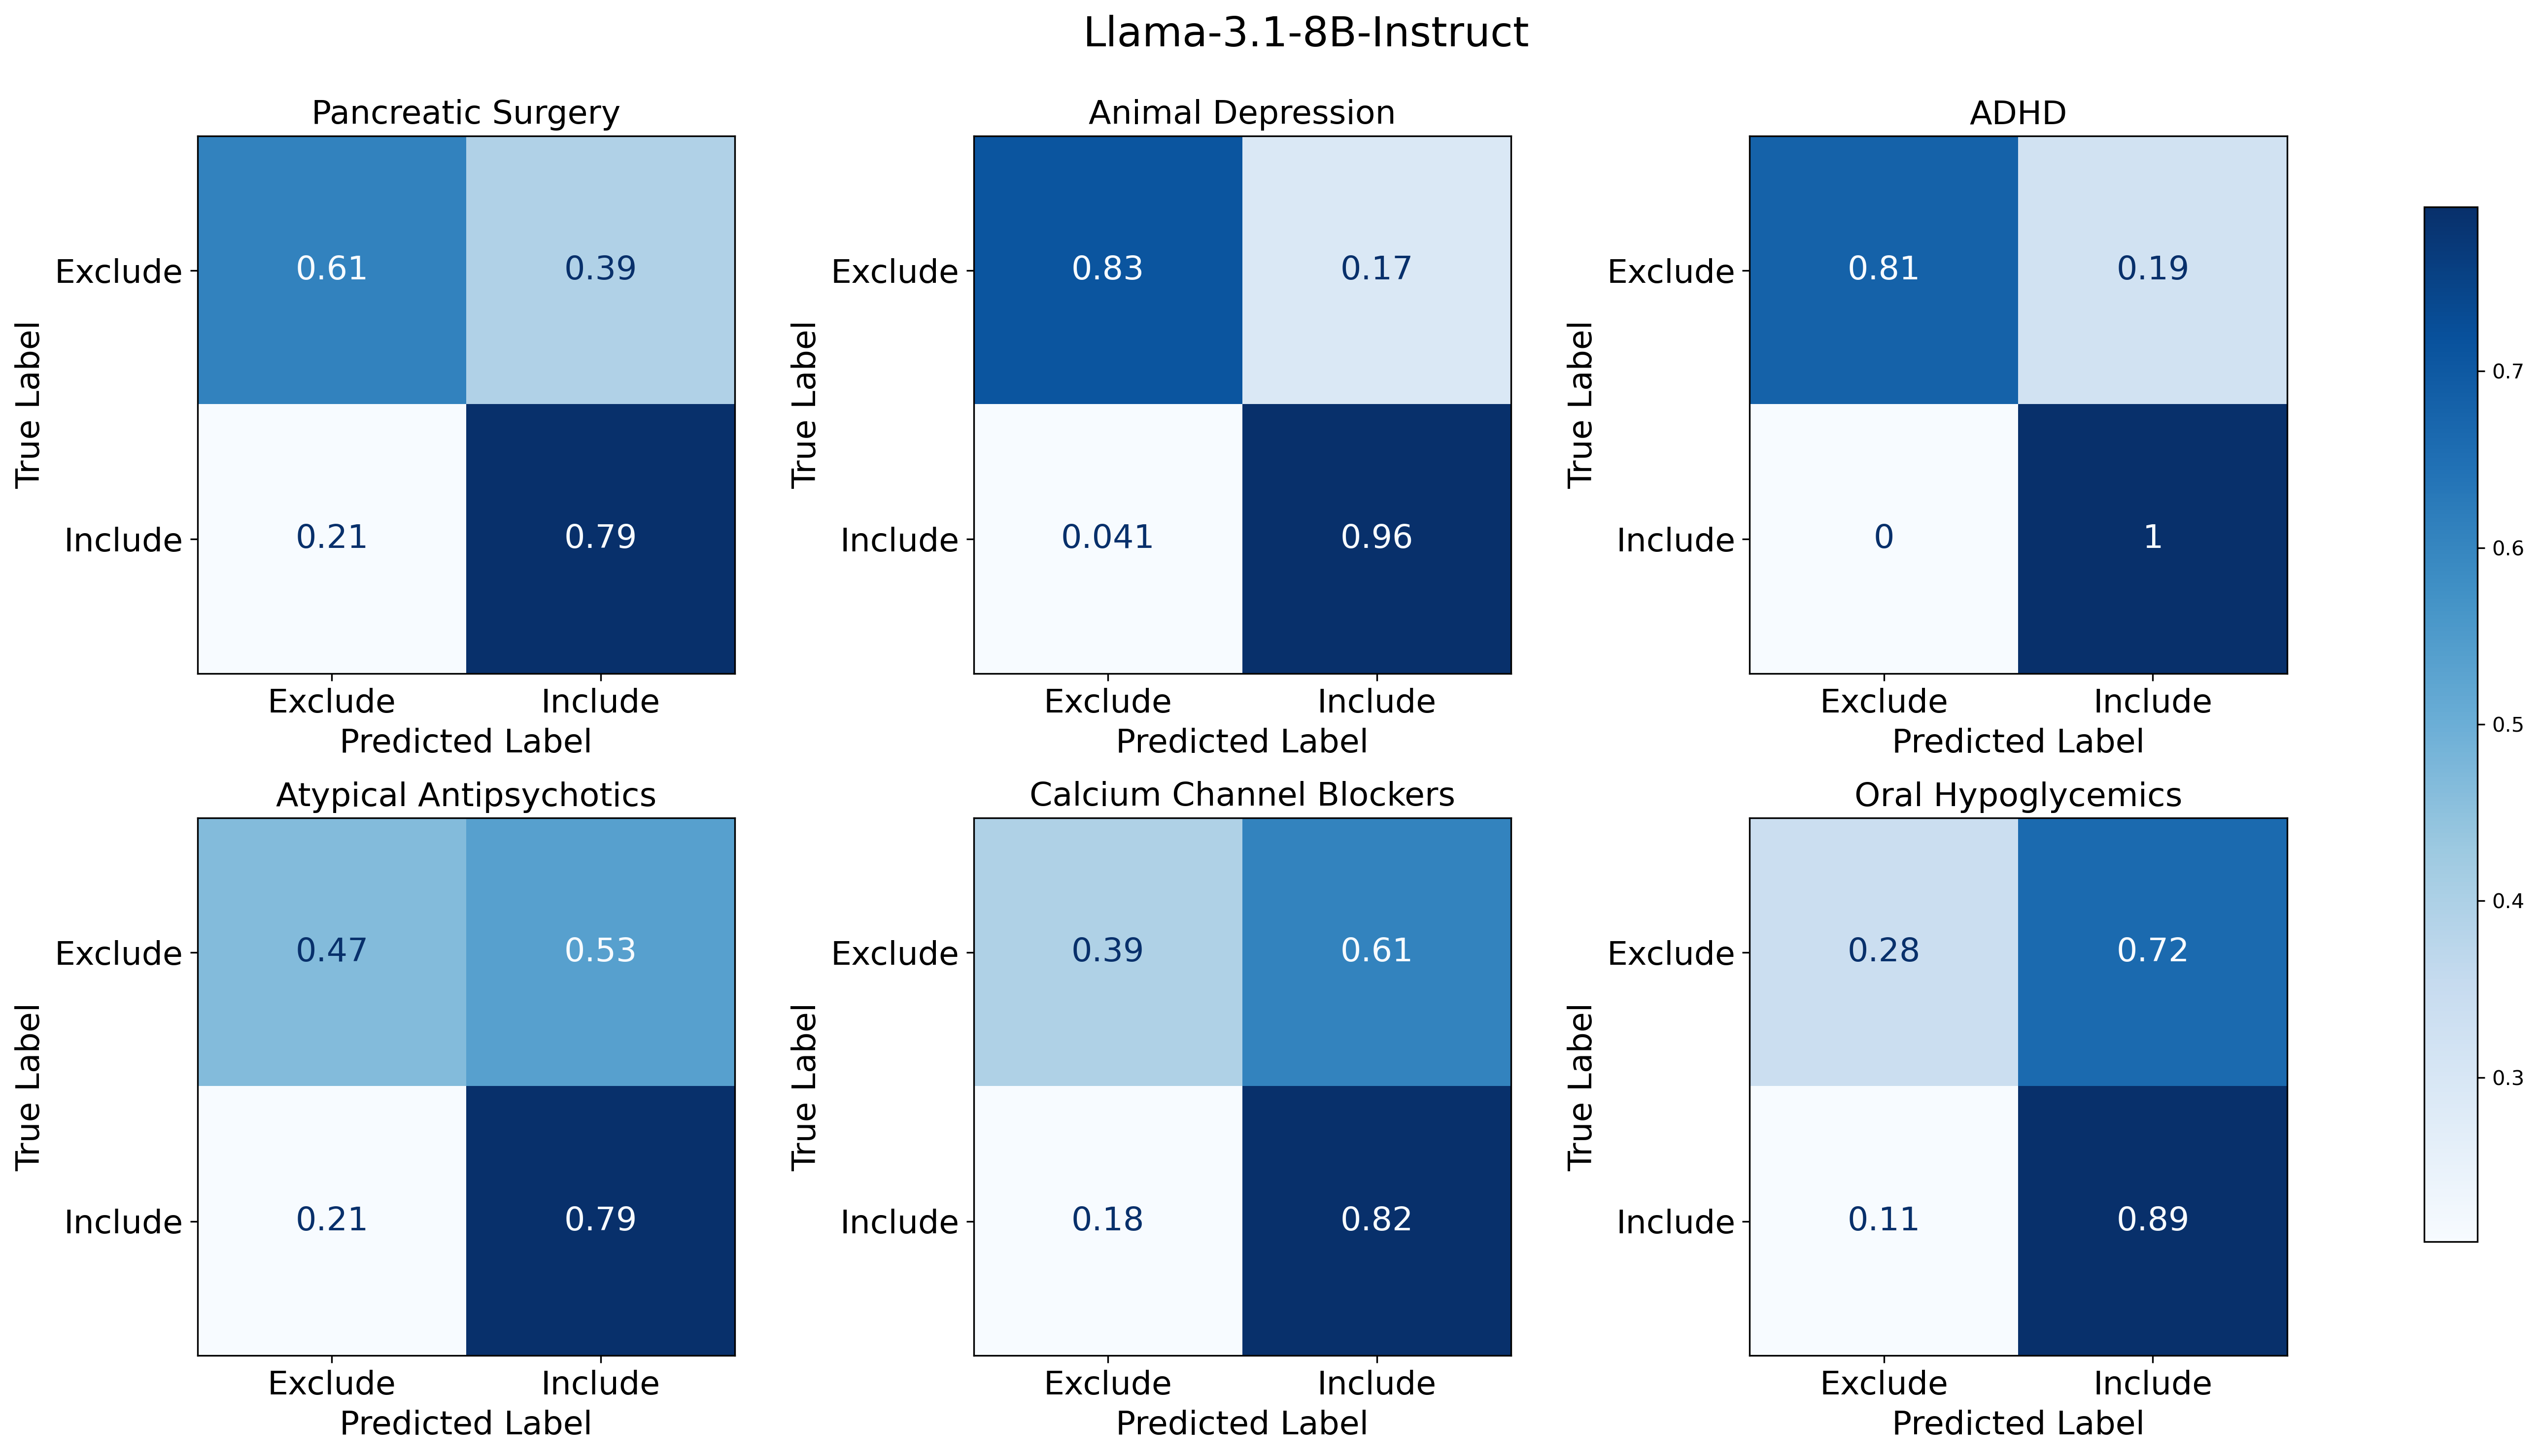

In [19]:
# Get the list of datasets and estimators
datasets = list_datasets

estimators = list(results['datasets'][datasets[0]].keys())

# Iterate over each estimator to create a separate figure
for estimator in estimators:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)  # Adjust the figure size as needed
    fig.suptitle(estimator_dict[estimator], fontsize=20)
    
    # Iterate over each dataset to plot the confusion matrices
    for j, dataset in enumerate(datasets):
        ax = axes[j // 3, j % 3]
        matrix_norm = results['datasets'][dataset][estimator]['matrix']['norm']
        plot_confusion_matrix(matrix_norm, ax, fontsize=16)
        ax.set_title(dataset_dict[dataset], fontsize=16)
    
    # Add a single colorbar for all subplots
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(axes[0, 0].images[0], cax=cbar_ax)
    
    plt.tight_layout(rect=[0, 0, 0.9, 0.98])
    
    # Save the figure as an SVG file
    plt.savefig(f'confusion_matrices_{estimator}.svg', format='svg')
    plt.show()

## Metric Boxplots
### Score DataFrame
To efficiently plot the bootstrapped metric scores, store all scores within one big dataframe:

In [20]:
# Create a list to collect data
data = []

for dataset in results['datasets']:
    for estimator in results['datasets'][dataset]:
        for metric in results['datasets'][dataset][estimator]['bootstrap']['scores']:
            scores = results['datasets'][dataset][estimator]['bootstrap']['scores'][metric]

            for score in scores:
                data.append({'dataset': dataset, 'estimator': estimator, 'metric': metric, 'score': score})




# Create a DataFrame from the collected data
df = pl.DataFrame(data)

### Plot Metrics

In [21]:
colors = {
    'boxes': '#004A71',
    'whiskers': '#34B2A6',
    'medians': '#EC963E',
    'caps': '#797B7F'
}

C:\Users\root\AppData\Local\Temp\ipykernel_904\1923424869.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, labels=estimators, patch_artist=True, showfliers=False)


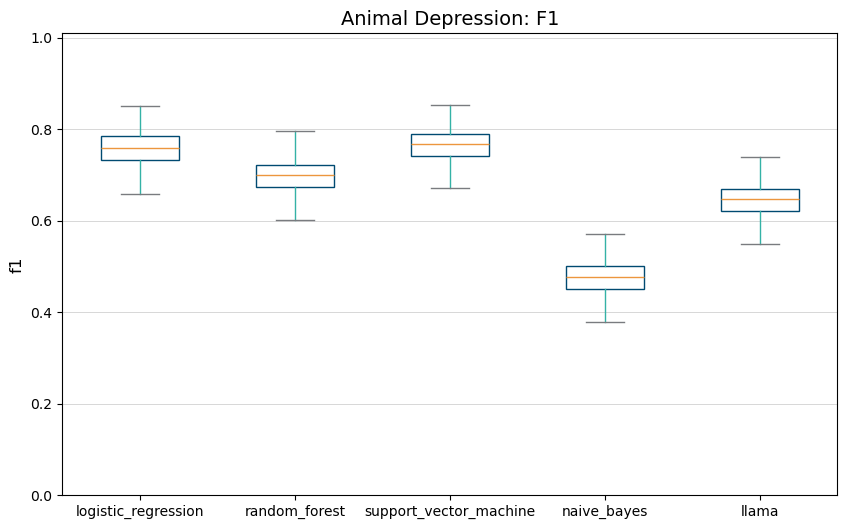

In [22]:
import matplotlib.pyplot as plt
import polars as pl

def plot_metric_boxplot(df, dataset, metric):
    """
    Plots a boxplot for the given dataset and metric and returns the axis.

    Parameters:
    - df: DataFrame containing the data
    - dataset: The dataset to filter on
    - metric: The metric to filter on

    Returns:
    - ax: The axis with the boxplot
    """
    # Hardcoded list of estimators
    estimators = [
        'logistic_regression',
        'random_forest',
        'support_vector_machine',
        'naive_bayes',
        'llama'
    ]
    
    # Hardcoded colors dictionary
    colors = {
        'boxes': '#004A71',
        'whiskers': '#34B2A6',
        'medians': '#EC963E',
        'caps': '#797B7F'
    }
    
    fig, ax = plt.subplots(figsize=(10, 6))

    # Filter the data for the current metric and dataset
    df_filtered = df.filter(
        (pl.col('dataset') == dataset) & (pl.col('metric') == metric)
    ).to_pandas()

    # Create a list to hold the data for each estimator
    data = [df_filtered[df_filtered['estimator'] == estimator]['score'] for estimator in estimators]

    # Plot the boxplot using pyplot
    box = ax.boxplot(data, labels=estimators, patch_artist=True, showfliers=False)

    # Set custom colors for each box
    for patch in box['boxes']:
        patch.set_facecolor('none')
        patch.set_edgecolor(colors['boxes'])

    # Set custom colors for whiskers, caps, and medians
    for whisker in box['whiskers']:
        whisker.set_color(colors['whiskers'])
    for cap in box['caps']:
        cap.set_color(colors['caps'])
    for median in box['medians']:
        median.set_color(colors['medians'])

    # Set the y-axis label to the metric
    ax.set_ylabel(metric, fontsize=12)

    # Set the y-axis limit
    ax.set_ylim(0, 1.01)

    # Ensure y-ticks are shown for the subplot
    ax.yaxis.set_tick_params(which='both', labelleft=True)
    
    # Display grid lines for y-ticks
    ax.grid(True, axis='y', linestyle='-', linewidth=0.7, alpha=0.5)

    # Set the title of the plot
    ax.set_title(f'{dataset_dict[dataset]}: {metric.capitalize()}', fontsize=14)

    return ax

# Example usage:
ax = plot_metric_boxplot(df, 'animal_depression', 'f1')

C:\Users\root\AppData\Local\Temp\ipykernel_904\3521204747.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, labels=[estimator_dict[est] for est in estimators], showfliers=False, patch_artist=True)
C:\Users\root\AppData\Local\Temp\ipykernel_904\3521204747.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, labels=[estimator_dict[est] for est in estimators], showfliers=False, patch_artist=True)
C:\Users\root\AppData\Local\Temp\ipykernel_904\3521204747.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, labels=[estimator_dict[est] for est in estima

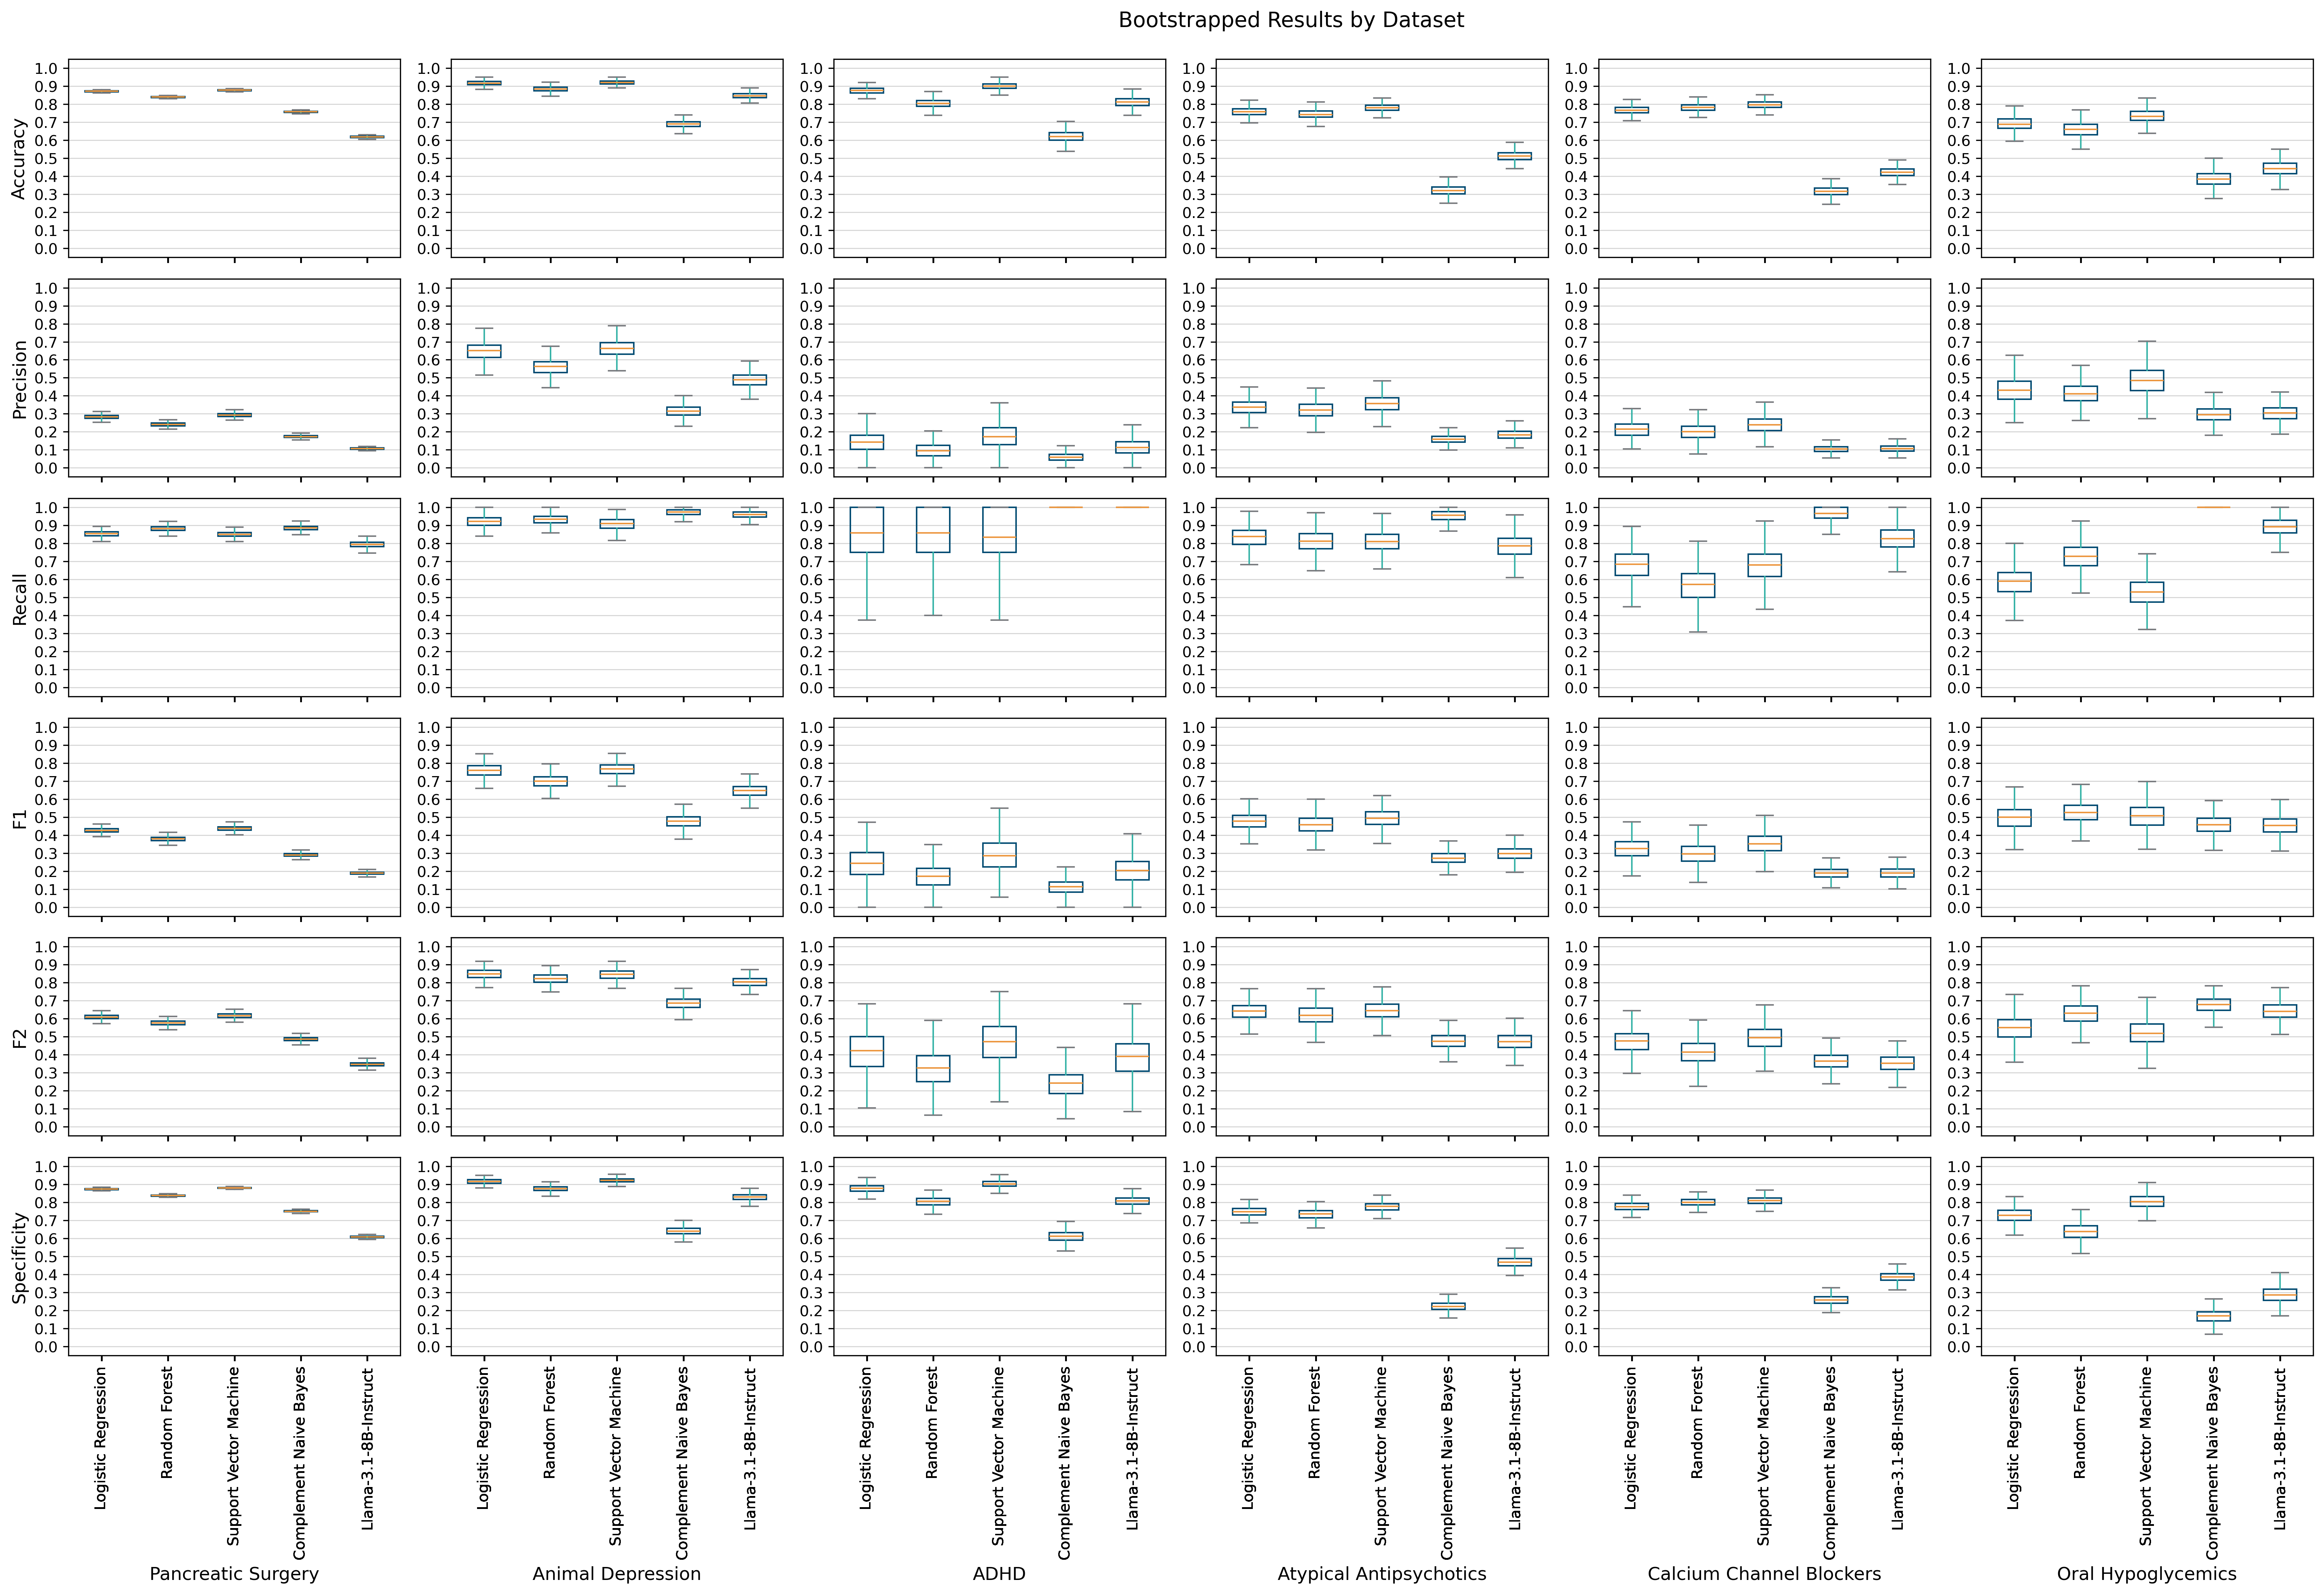

In [23]:
list_metrics = list(metrics.keys())

# Increase the width of the figure
fig, axes = plt.subplots(len(list_metrics), len(list_datasets), figsize=(24, 15), sharex=True, sharey=True, dpi=300)

for i, metric in enumerate(list_metrics):
    for j, dataset in enumerate(list_datasets):
        ax = axes[i, j]
        
        # Filter the data for the current metric and dataset
        df_filtered = df.filter(
            (pl.col('dataset') == dataset) & (pl.col('metric') == metric)
        ).to_pandas()
        
        # Create a list to hold the data for each estimator
        data = [df_filtered[df_filtered['estimator'] == estimator]['score'] for estimator in estimators]
        
        # Plot the boxplot using pyplot
        box = ax.boxplot(data, labels=[estimator_dict[est] for est in estimators], showfliers=False, patch_artist=True)
        
        # Set custom colors for each box
        for patch in box['boxes']:
            patch.set_facecolor('none')
            patch.set_edgecolor(colors['boxes'])
        
        # Set custom colors for whiskers, caps, and medians
        for whisker in box['whiskers']:
            whisker.set_color(colors['whiskers'])
        for cap in box['caps']:
            cap.set_color(colors['caps'])
        for median in box['medians']:
            median.set_color(colors['medians'])
        
        # Remove the title of the subplot
        ax.set_title('')
        
        # Set the y-axis labels to the metrics for the first column
        if j == 0:
            ax.set_ylabel(metric.capitalize(), fontsize=12)
        
        # Set the x-axis labels to the datasets below the lowest subplot in each column
        if i == len(list_metrics) - 1:
            ax.set_xlabel(dataset_dict[dataset], fontsize=12)
        
        # Rotate the x-ticks by 90 degrees
        ax.tick_params(axis='x', rotation=90)
        
        # Ensure y-ticks are shown for each subplot
        ax.set_yticks([i * 0.1 for i in range(11)])  # Set y-ticks in steps of 0.1
        ax.yaxis.set_tick_params(which='both', labelleft=True)
        
        # Display grid lines for y-ticks
        ax.grid(True, axis='y', linestyle='-', linewidth=0.7, alpha=0.5)

plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.suptitle('Bootstrapped Results by Dataset', fontsize=14)

# Save the figure as an SVG file
plt.savefig('evaluation_metrics_by_dataset.svg', format='svg')

plt.show()

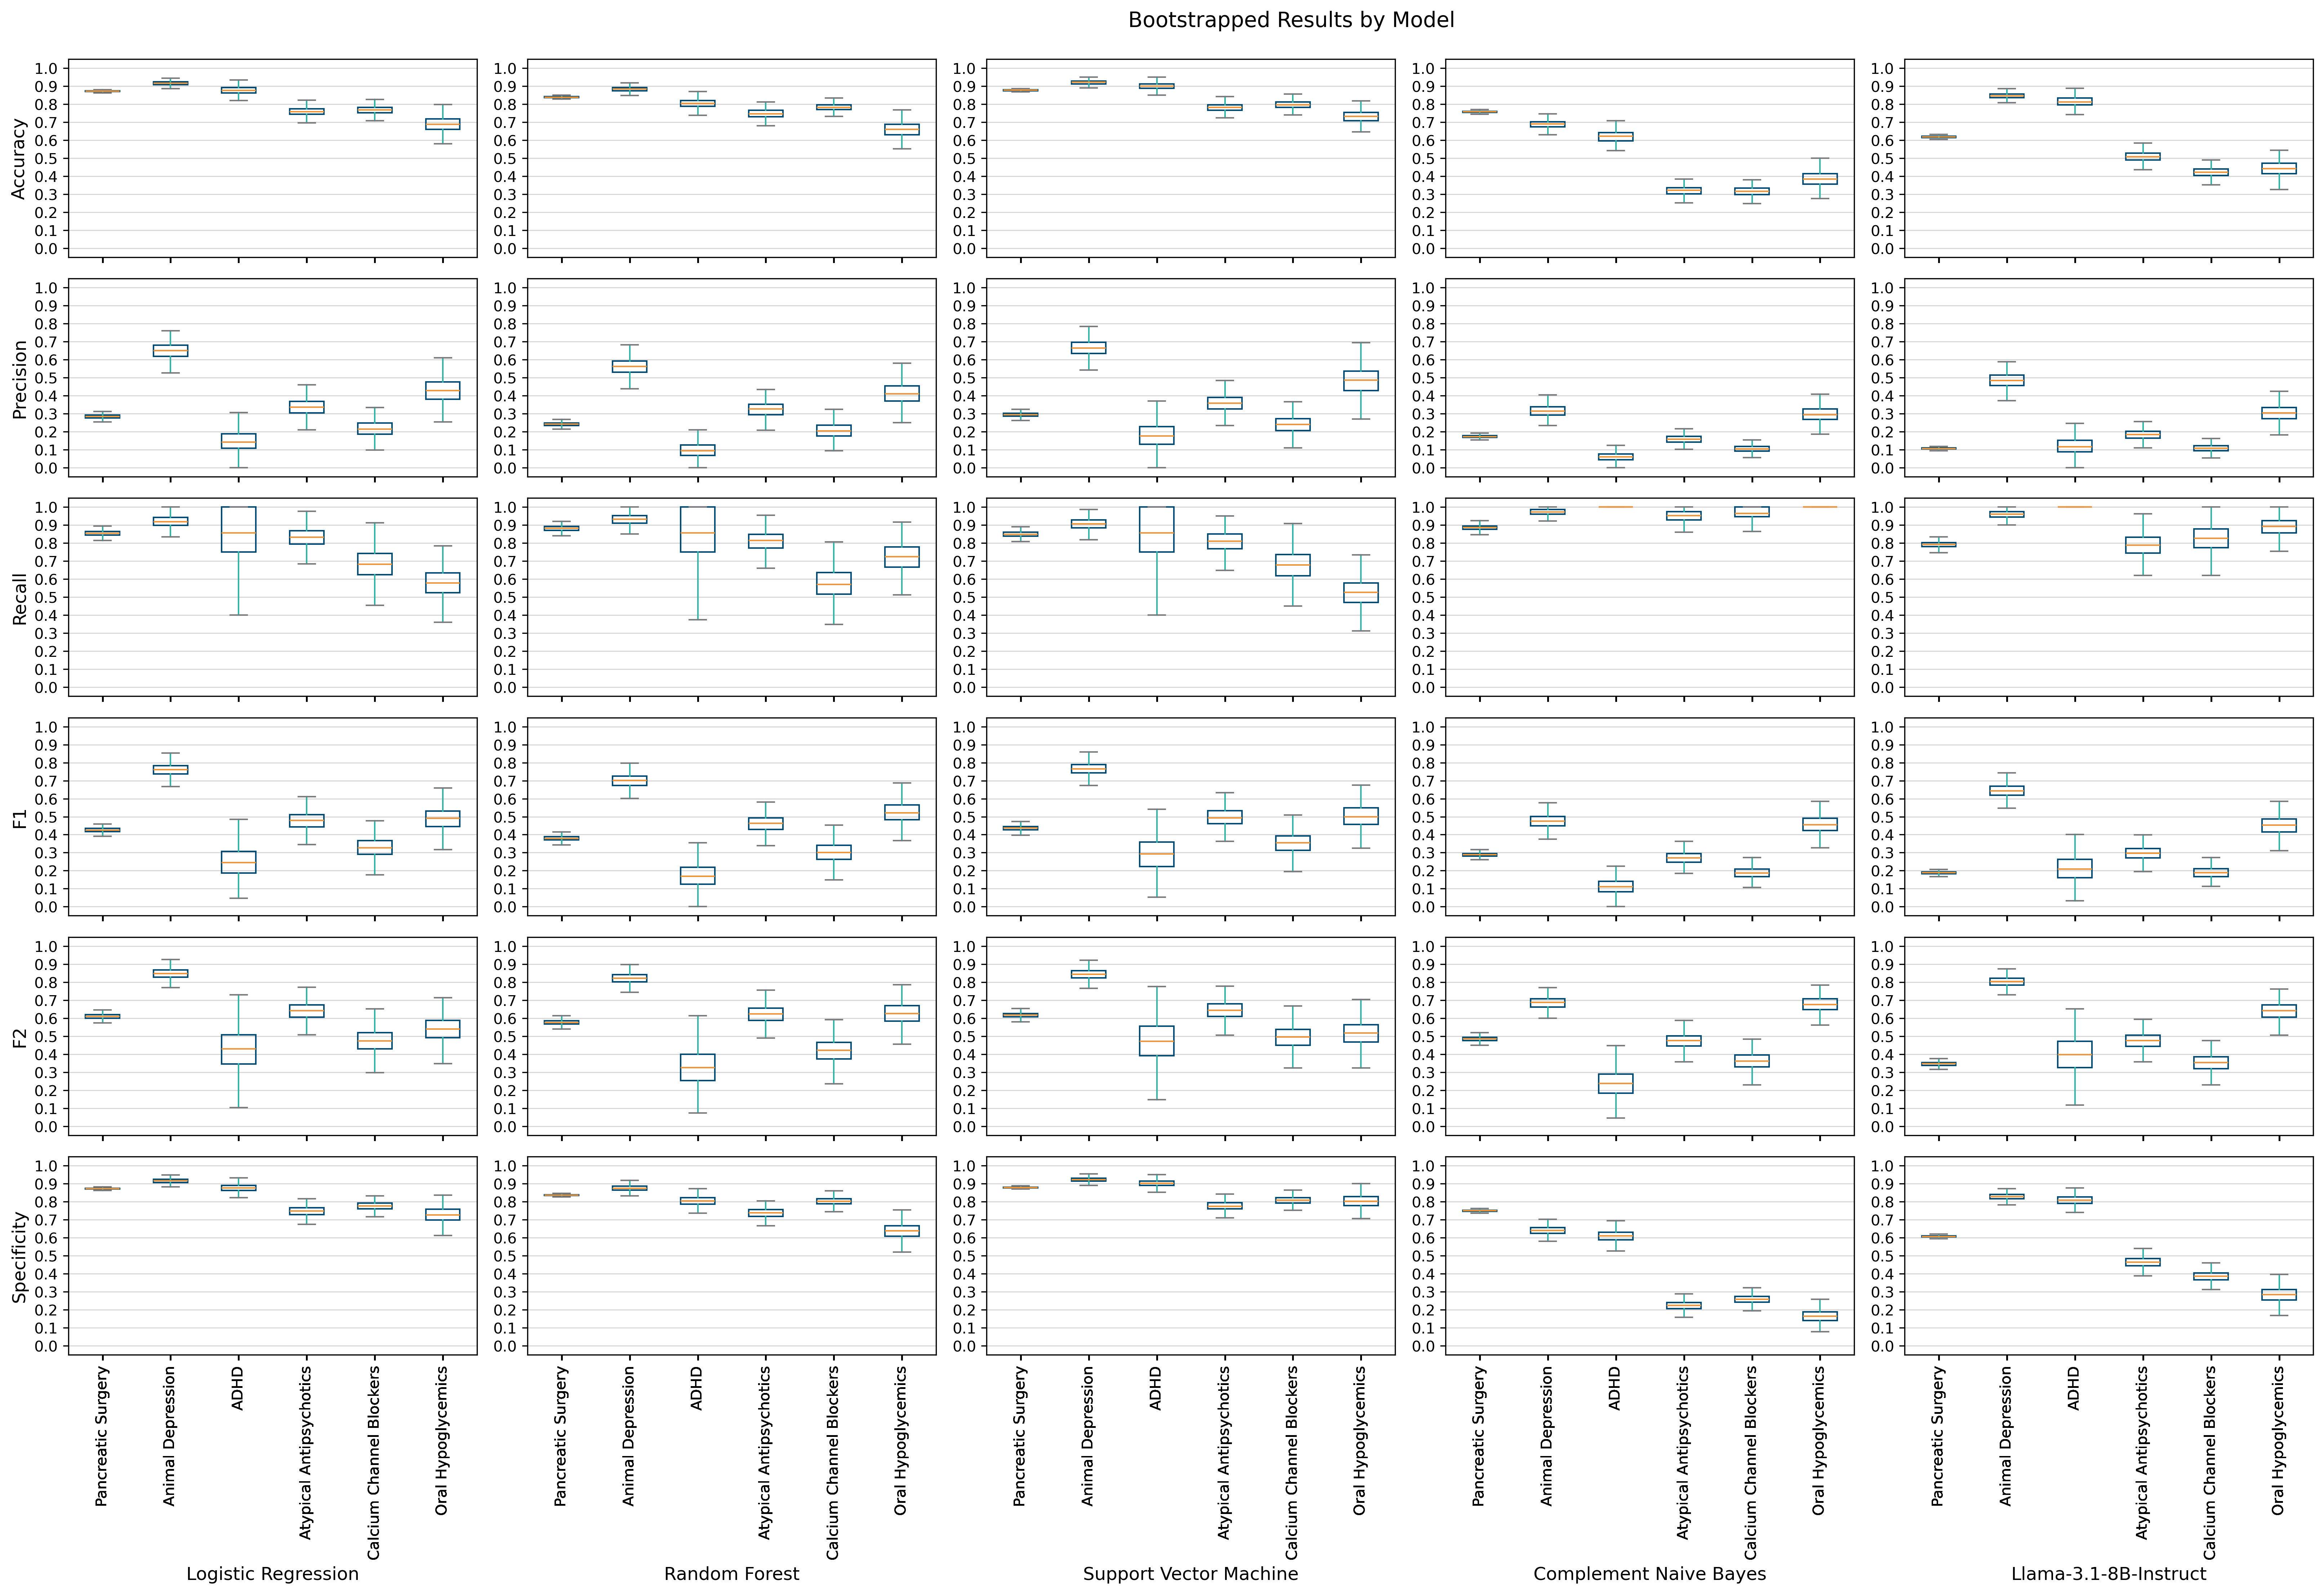

In [25]:
import matplotlib.pyplot as plt

colors = {
    'boxes': '#004A71',
    'whiskers': '#34B2A6',
    'medians': '#EC963E',
    'caps': '#797B7F'
}

list_metrics = list(metrics.keys())
list_estimators = list(results['datasets'][list_datasets[0]].keys())

# Create a figure with subplots for each metric and estimator
fig, axes = plt.subplots(len(list_metrics), len(list_estimators), figsize=(24, 15), sharex=True, sharey=True, dpi=300)

for i, metric in enumerate(list_metrics):
    for j, estimator in enumerate(list_estimators):
        ax = axes[i, j]
        
        # Filter the data for the current metric and estimator
        df_filtered = df.filter(
            (pl.col('metric') == metric) & (pl.col('estimator') == estimator)
        ).to_pandas()
        
        # Create a list to hold the data for each dataset
        data = [df_filtered[df_filtered['dataset'] == dataset]['score'] for dataset in list_datasets]
        
        # Plot the boxplot using pyplot
        box = ax.boxplot(data, labels=[dataset_dict[ds] for ds in list_datasets], showfliers=False, patch_artist=True)
        
        # Set custom colors for each box
        for patch in box['boxes']:
            patch.set_facecolor('none')
            patch.set_edgecolor(colors['boxes'])
        
        # Set custom colors for whiskers, caps, and medians
        for whisker in box['whiskers']:
            whisker.set_color(colors['whiskers'])
        for cap in box['caps']:
            cap.set_color(colors['caps'])
        for median in box['medians']:
            median.set_color(colors['medians'])
        
        # Remove the title of the subplot
        ax.set_title('')
        
        # Set the y-axis labels to the metrics for the first column
        if j == 0:
            ax.set_ylabel(metric.capitalize(), fontsize=12)
        
        # Set the x-axis labels to the estimators below the lowest subplot in each column
        if i == len(list_metrics) - 1:
            ax.set_xlabel(estimator_dict[estimator], fontsize=12)
        
        # Rotate the x-ticks by 90 degrees
        ax.tick_params(axis='x', rotation=90)
        
        # Set ticks of 0.1
        ax.set_yticks([i * 0.1 for i in range(11)])  # Set y-ticks in steps of 0.1

        # Ensure y-ticks are shown for each subplot
        ax.yaxis.set_tick_params(which='both', labelleft=True)
        
        # Display grid lines for y-ticks
        ax.grid(True, axis='y', linestyle='-', linewidth=0.7, alpha=0.5)

plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.suptitle('Bootstrapped Results by Model', fontsize=14)

# Save the figure as an SVG file
plt.savefig('evaluation_metrics_by_estimator.svg', format='svg')

plt.show()

## Metric Summary
Print metrics for each dataset and estimator:

In [26]:
def rank_by_metric(dataset: str, metric: str):

    filter = ['dataset', 'estimator', metric]
    
    sorted_columns = [metric] + [
        col for col in results['scores'].columns if col not in filter
    ]

    sorted_scores = results['scores'].filter(
        pl.col('dataset') == dataset
    ).sort(
        pl.col(metric).struct.field(f'{metric}_mean'),
        descending=True
    ).select(['dataset', 'estimator'] + sorted_columns)

    print(f'Best {metric} scores for {dataset} dataset:')
    with pl.Config(tbl_cols=-1, tbl_width_chars=1000):
        print(sorted_scores, end='\n\n')



In [27]:
for dataset in list_datasets:
    rank_by_metric(dataset, 'roc_auc')

Best roc_auc scores for pancreatic_surgery dataset:
shape: (5, 9)
┌────────────────────┬────────────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┐
│ dataset            ┆ estimator              ┆ roc_auc          ┆ accuracy         ┆ precision        ┆ recall           ┆ f1               ┆ f2               ┆ specificity      │
│ ---                ┆ ---                    ┆ ---              ┆ ---              ┆ ---              ┆ ---              ┆ ---              ┆ ---              ┆ ---              │
│ str                ┆ str                    ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        │
╞════════════════════╪════════════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╡
│ pancreatic_surgery ┆ logist

In [28]:
metric = 'accuracy'

for dataset in results['datasets']:
    print(dataset.upper(), end='\n')
    for metric in metrics:
        print(metric.upper())
        scores = results['scores'].filter(
            pl.col('dataset') == dataset
        ).sort(
            pl.col(metric).struct.field(f'{metric}_mean'),
            descending=True
        )

        with pl.Config(tbl_cols=-1, tbl_width_chars=1000):
            print(scores, end='\n\n')
    
    print('\n\n\n')

ADHD
ACCURACY
shape: (5, 9)
┌─────────┬────────────────────────┬──────────────────┬──────────────────┬────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┐
│ dataset ┆ estimator              ┆ accuracy         ┆ precision        ┆ recall         ┆ f1               ┆ f2               ┆ specificity      ┆ roc_auc          │
│ ---     ┆ ---                    ┆ ---              ┆ ---              ┆ ---            ┆ ---              ┆ ---              ┆ ---              ┆ ---              │
│ str     ┆ str                    ┆ struct[3]        ┆ struct[3]        ┆ struct[3]      ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        ┆ struct[3]        │
╞═════════╪════════════════════════╪══════════════════╪══════════════════╪════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╡
│ adhd    ┆ support_vector_machine ┆ {0.9,0.86,0.94}  ┆ {0.18,0.04,0.33} ┆ {0.83,0.5,1.0} ┆ {0.29,0.08,0.48} ┆ {0.46,0.17,0.69} ┆ {0

In [29]:
df = results['scores'].select(
    pl.exclude('roc_auc')
)

for metric in metrics.keys():
    df = df.unnest(metric)

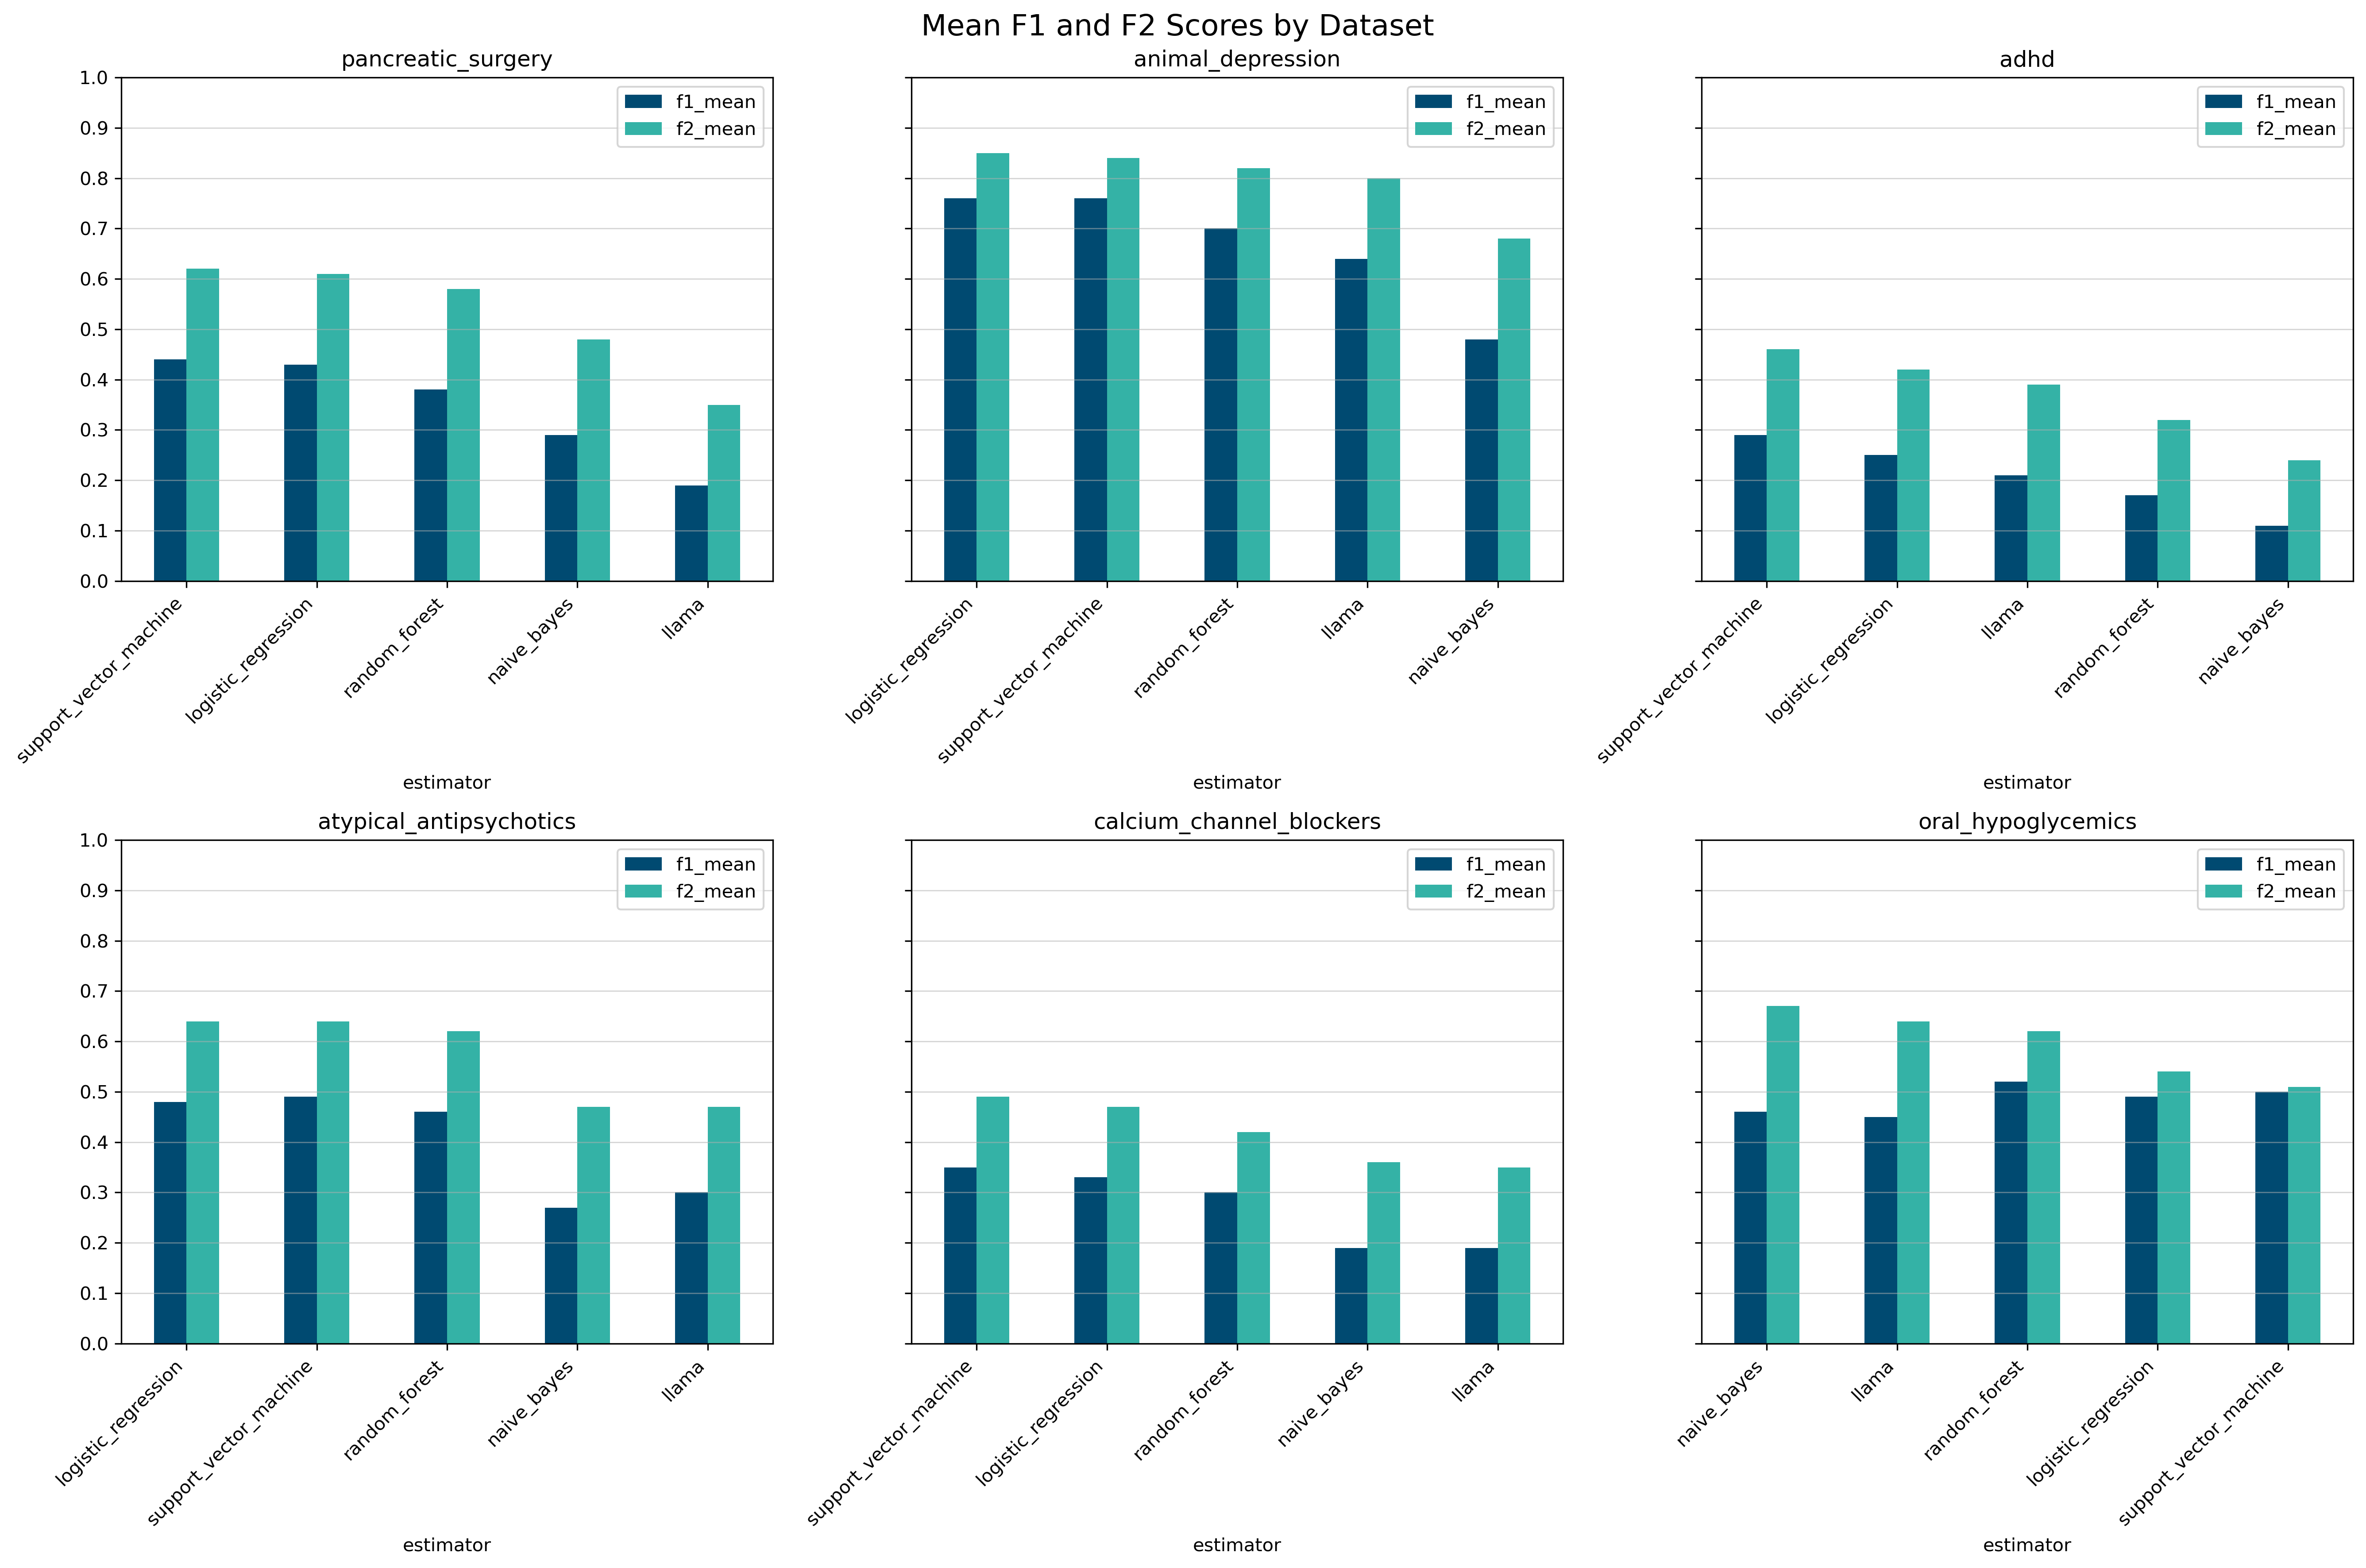

In [30]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

datasets = list_datasets

# Create a 2x3 subplot figure with shared y-axis
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=300, sharey=True)
axes = axes.flatten()

# Iterate over datasets and create a plot for each
for i, dataset in enumerate(datasets):
    panda = df.filter(
        pl.col('dataset') == dataset
    ).sort(
        by='f2_mean',
        descending=True
    ).select(['dataset', 'estimator', 'f1_mean', 'f2_mean']).to_pandas()
    
    # Plot f1_mean and f2_mean for each estimator
    panda.plot(kind='bar', x='estimator', y=['f1_mean', 'f2_mean'], legend=True, ax=axes[i], title=dataset, color=['#004A71', '#34B2A6'])
    axes[i].set_ylim(0, 1)  # Set y-axis range between 0 and 1
    axes[i].set_yticks([i * 0.1 for i in range(11)])  # Set y-ticks in steps of 0.1
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
    
    # Display grid lines for y-ticks
    axes[i].grid(True, axis='y', linestyle='-', linewidth=0.7, alpha=0.5)

plt.suptitle('Mean F1 and F2 Scores by Dataset', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()